This code was used to try to reconstruct the signal from the encoders. It also applies some filtering to the encoder data. it is a little bit messy but feel free to explore it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import lib_bbmdev
import logging
from datetime import datetime
import sys
from pathlib import Path

import scipy.signal


%matplotlib inline

In [2]:
#initialize
os.chdir(r'C:\Users\Arcalab_WS\DevelopingToolkit\bbm_run2_tdms')
path = "Data/2023_run2/"
excel_file = "tdms_dataframe_xlsx.xlsx"
df_excel = pd.read_excel(path+excel_file, header=1)
df_stable = df_excel.dropna()
df_stable.set_index("File", inplace = True)
df_stable

,0,Iu,Iv,Iw,A,B,Z,H,SV1,SV2,...,Count,Vu,Vv,Vw,Duration [s],Sampling Frequency [Hz],Low TH,High TH,Target freq [Hz],Is in Spreadsheet?
File,,,,,,,,,,,,,,,,,,,,,
tdms103_room-to-cryo.tdms,4,1,1,1,1,1,1,1,0,0,...,1,1,1,1,9348.000,1000,-0.5,0.5,1.0,Y
tdms104_room-to-cryo.tdms,5,1,1,1,1,1,1,1,0,0,...,1,1,1,1,15217.000,1000,-0.5,0.5,0.8,Y
tdms35_room-to-cryo.tdms,7,1,1,1,1,1,1,1,1,1,...,0,1,1,1,9959.000,1000,-8.0,-0.5,1.0,Y
tdms56_room-to-cryo.tdms,12,1,1,1,1,1,1,1,1,1,...,0,1,1,1,8452.000,1000,-8.0,-0.5,1.0,Y
tdms58_room-to-cryo.tdms,13,1,1,1,1,1,1,1,1,1,...,0,1,1,1,3648.000,1000,-8.0,-0.5,1.0,Y
tdms61_room-to-cryo.tdms,14,1,1,1,1,1,1,1,1,1,...,0,1,1,1,2105.000,1000,-8.0,-0.5,1.0,Y
tdms64_room-to-cryo.tdms,17,1,1,1,1,1,1,1,1,1,...,0,1,1,1,21744.009,1000,-8.0,-0.5,1.0,Y
tdms75_room-to-cryo.tdms,23,1,1,1,1,1,1,1,0,0,...,1,1,1,1,11302.000,1000,-0.5,0.5,1.0,Y
tdms88_room-to-cryo.tdms,29,1,1,1,1,1,1,1,0,0,...,1,1,1,1,11054.000,1000,-0.5,0.5,1.0,Y


In [3]:
os.chdir(r'C:\Users\Arcalab_WS\DevelopingToolkit\bbm_run2_tdms')
filename = "tdms104_room-to-cryo.tdms"




created_directory = lib_bbmdev.create_directory('C:/Users/Arcalab_WS/DevelopingToolkit/bbm_run2_tdms/Data/2023_run2/encoder_data/'+filename+'_encoder')

df_signal = lib_bbmdev.tdms_load_selected_custom(path + 'tdms/'+filename , samplerate=1000, print_=True)
os.chdir(created_directory)
df_signal

Directory 'C:/Users/Arcalab_WS/DevelopingToolkit/bbm_run2_tdms/Data/2023_run2/encoder_data/tdms104_room-to-cryo.tdms_encoder' already exists.


,time,Iu,Iv,Iw,A,B,Z,H,Count,Vu,Vv,Vw
0,0.000,-0.000872,0.004944,0.004026,1.092061,0.421300,-0.547594,0.111686,-0.001538,-0.007424,-0.002294,-0.007306
1,0.001,-0.001192,0.004944,0.004026,1.092379,0.422248,-0.562233,0.111370,-0.000589,-0.002279,-0.002294,-0.002161
2,0.002,-0.000872,0.004628,0.004345,1.092698,0.422564,-0.588647,0.110105,-0.001222,-0.002279,-0.002294,-0.007306
3,0.003,-0.000553,0.005260,0.004664,1.091742,0.421932,-0.618880,0.115798,-0.001538,-0.007424,-0.002294,0.002983
4,0.004,-0.000553,0.004944,0.004345,1.092379,0.421616,-0.677755,0.111370,-0.001538,-0.007424,-0.007439,-0.007306
...,...,...,...,...,...,...,...,...,...,...,...,...
15216995,15216.995,-0.001192,0.004944,0.004345,1.085683,1.070755,-0.644976,0.112951,-10.380818,0.002865,-0.002294,-0.007306
15216996,15216.996,-0.001192,0.005260,0.004664,1.085045,1.069808,-0.727401,0.112951,-10.380818,-0.002279,-0.007439,0.002983
15216997,15216.997,-0.001192,0.004944,0.004664,1.085045,1.070124,-0.826056,0.112319,-10.380818,-0.002279,0.002850,-0.002161
15216998,15216.998,-0.000553,0.004944,0.004026,1.085683,1.070440,-0.909118,0.113268,-10.380818,0.002865,-0.002294,0.002983


In [4]:
# ログの設定
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# ログのフォーマットを設定
formatter = logging.Formatter('%(asctime)s - %(message)s')

# ログのファイル出力先を設定
log_file = 'analysis.log'
file_handler = logging.FileHandler(log_file)
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

# 解析開始時刻
start_time = datetime.now()

Stability zone goes from index 5787157 to index 14335871.
0.9332483690000001 1.0917416690000001
0.9156568680000001 1.0906560500000002
-1.029731839 1.090403027
[[0.88658595055, 1.14632875245], [0.8698740246000001, 1.1451888525000002], [-1.0812184309500001, 1.14492317835]]


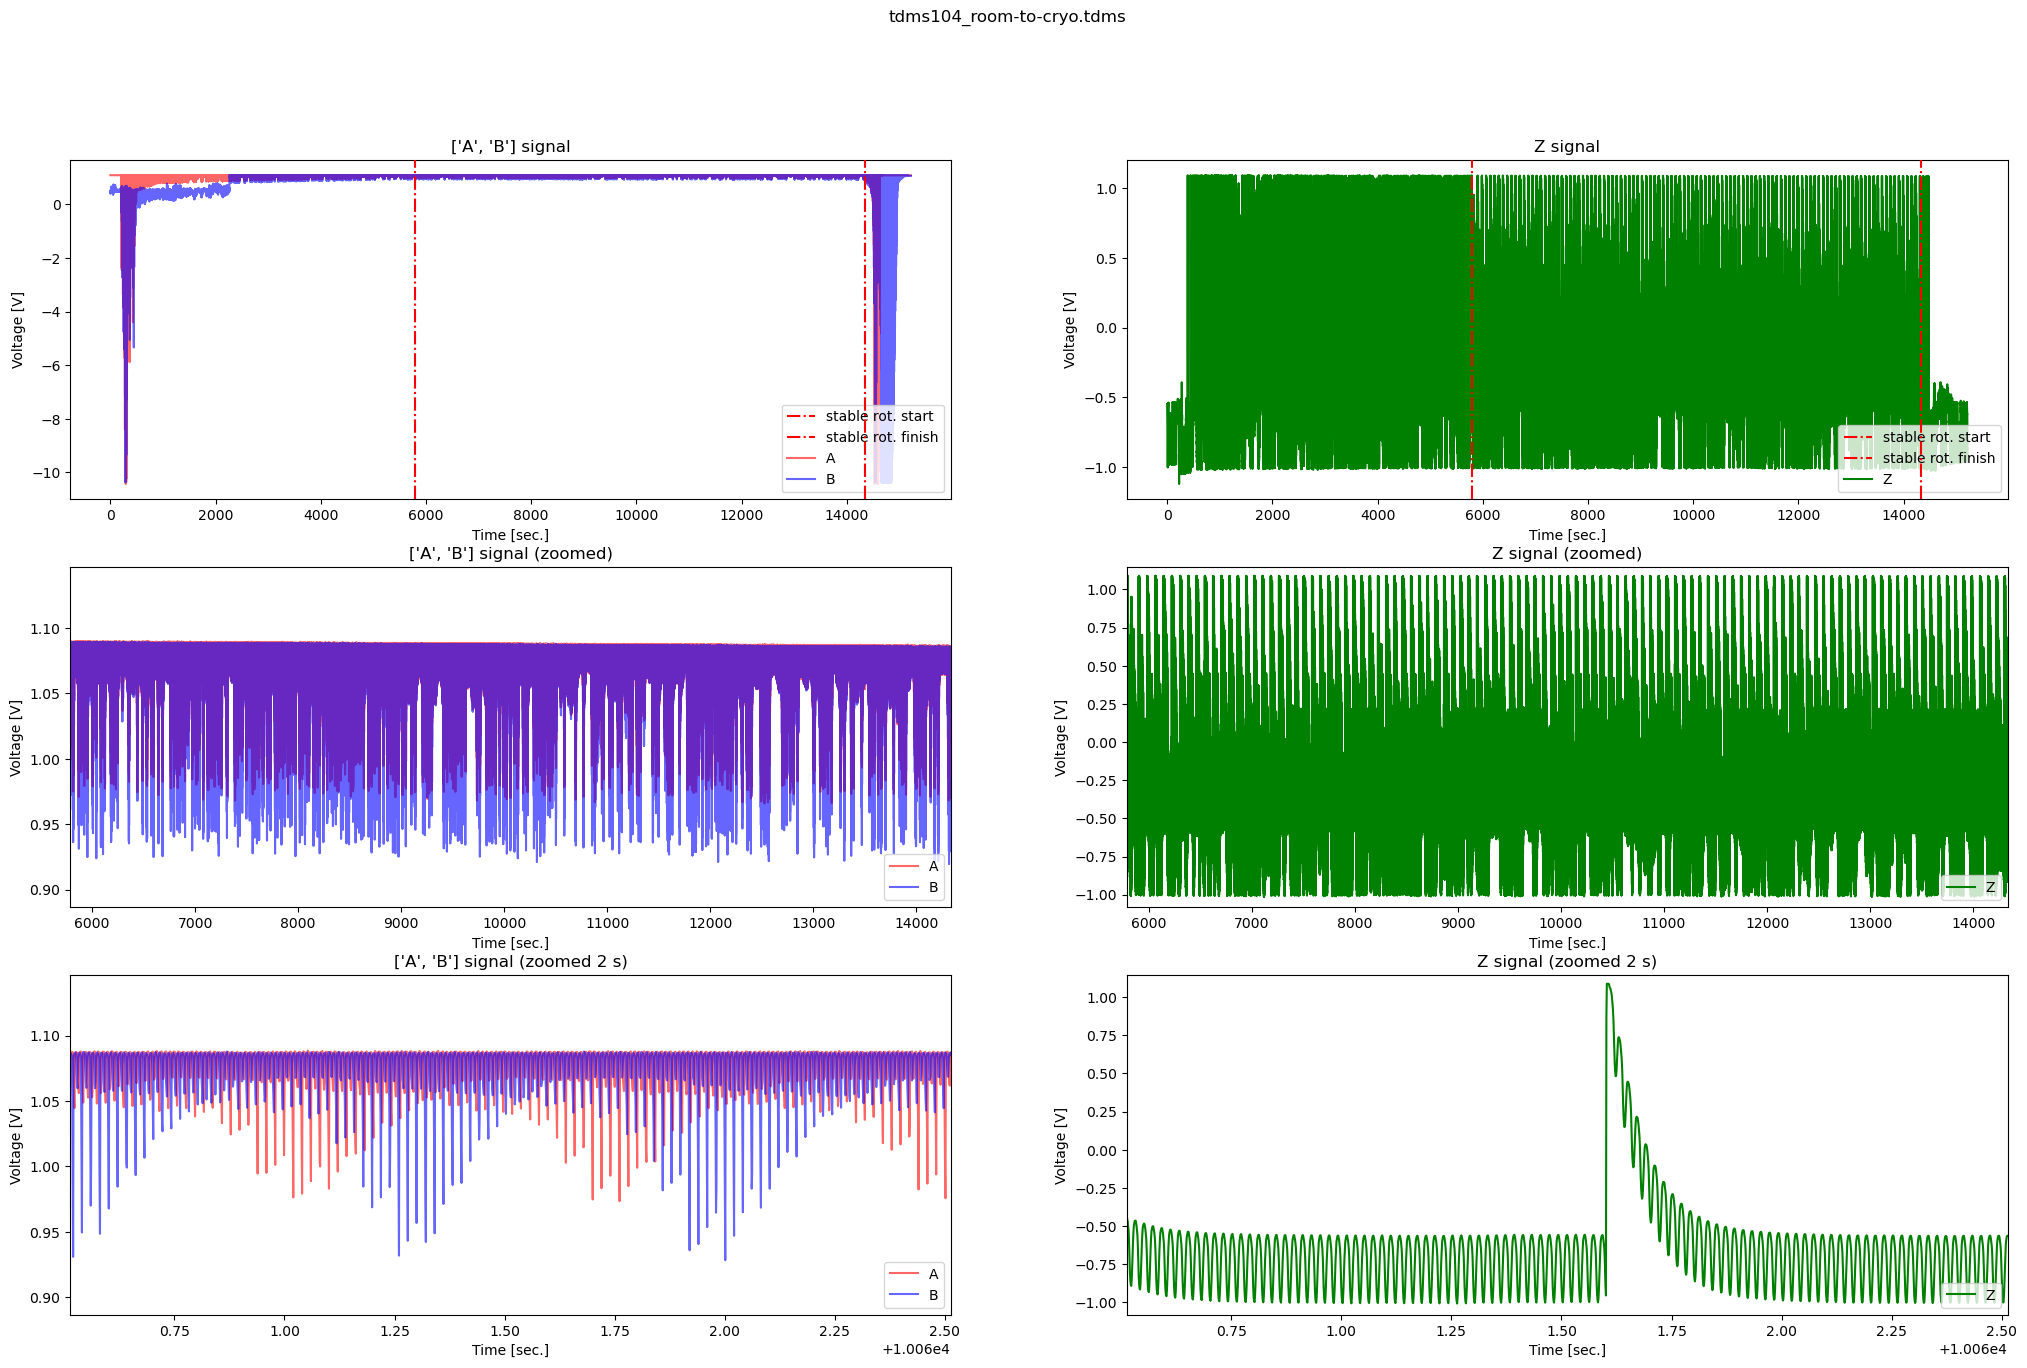

In [5]:
#%%time
#frequency
#encorder_threshold_high = 0.
#encorder_threshold_low = -4.
low_th, high_th, target_freq = df_stable.loc[filename, ['Low TH', 'High TH', 'Target freq [Hz]']]
threshold,time_stamps=lib_bbmdev.triggerd_window(df_signal['Z'].to_numpy(),df_signal['time'].to_numpy(),high_threshold=high_th,low_threshold=low_th,window_size=2)
period,freq=lib_bbmdev.time2freq(time_stamps)

try:
    if target_freq == 0.8:
        stable_index = np.where((freq>0.955*target_freq)&(freq<1.01*target_freq))[0]
    else:
        stable_index = np.where((freq>target_freq)&(freq<1.01*target_freq))[0]
    stable_str = time_stamps[1:][stable_index[0]]
    stable_fin = time_stamps[1:][stable_index[-1]]
except:
    stable_str = np.inf
    stable_fin = np.inf



limA, limB, limZ = lib_bbmdev.stability_zone_zoom([df_signal['A'],df_signal['B'],df_signal['Z']], df_signal['time'], stable_str, stable_fin, margin = 0.05, print_=True)
start, fin = lib_bbmdev.stability_zone_start_end(df_signal['time'], stable_str, stable_fin, print_ = False)

sr = 100
sec_windowAB, sec_windowZ = 2, 2
y_data = df_signal['A'][::sr], df_signal['B'][::sr], df_signal['Z'][::sr]

y_data_zoom = df_signal['A'][::], df_signal['B'][::], df_signal['Z'][::]

x_data = df_signal['time'][::sr]
x_data_zoom = df_signal['time'][::]
fig, axs = plt.subplots(3,2, figsize=(25,15))
plot_data = list(y_data)
plot_data_zoom = list(y_data_zoom)
plot_labels = ["A", "B", "Z"]
plot_col = ["r", "b", "g"]

#first row
# Call the function with common time_data, multiple data arrays, and specified colors
axs[0,0].axvline(x = stable_str,c = 'r',ls='-.',label = 'stable rot. start', zorder=10) # vertical line at the start
axs[0,0].axvline(x = stable_fin,c = 'r',ls='-.',label = 'stable rot. finish', zorder=10) # vertical line at the finish
lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[0,0],
    x_data,
    plot_data[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha = 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[0,0], "Time [sec.]", "Voltage [V]")
axs[0,0].autoscale(enable=True, axis="x", tight=False)
axs[0,0].autoscale(enable=True, axis="y", tight=False)
axs[0,0].set_title(f'{plot_labels[0:2]} signal')
axs[0,0].legend(loc="lower right")

axs[0,1].axvline(x = stable_str,c = 'r',ls='-.',label = 'stable rot. start', zorder=10) # vertical line at the start
axs[0,1].axvline(x = stable_fin,c = 'r',ls='-.',label = 'stable rot. finish', zorder=10) # vertical line at the finish
lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[0,1],
    x_data,
    [plot_data[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[0,1], "Time [sec.]", "Voltage [V]")
axs[0,1].autoscale(enable=True, axis="x", tight=False)
axs[0,1].autoscale(enable=True, axis="y", tight=False)
axs[0,1].set_title(f'{plot_labels[2]} signal')
axs[0,1].legend(loc="lower right")


#second row 

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[1,0],
    x_data,
    plot_data[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha = 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[1,0], "Time [sec.]", "Voltage [V]")
axs[1,0].autoscale(enable=True, axis="x", tight=False)
axs[1,0].autoscale(enable=True, axis="y", tight=False)
axs[1,0].set_ylim(limA)
axs[1,0].set_title(f'{plot_labels[0:2]} signal (zoomed)')
axs[1,0].set_xlim(stable_str, stable_fin)
axs[1,0].legend(loc="lower right")

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[1,1],
    x_data,
    [plot_data[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[1,1], "Time [sec.]", "Voltage [V]")
axs[1,1].autoscale(enable=True, axis="x", tight=False)
axs[1,1].autoscale(enable=True, axis="y", tight=False)
axs[1,1].set_ylim(limZ)
axs[1,1].set_title(f'{plot_labels[2]} signal (zoomed)')
axs[1,1].set_xlim(stable_str, stable_fin)
axs[1,1].legend(loc="lower right")


#third row

lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[2,0],
    x_data_zoom,
    plot_data_zoom[0:2],
    labels=plot_labels[0:2],
    plot_col=plot_col[0:2],
    alpha= 0.6
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(axs[2,0], "Time [sec.]", "Voltage [V]")
axs[2,0].autoscale(enable=True, axis="x", tight=False)
axs[2,0].autoscale(enable=True, axis="y", tight=False)
axs[2,0].set_ylim(limA)
axs[2,0].set_title(f'{plot_labels[0:2]} signal (zoomed {sec_windowAB} s)')
axs[2,0].set_xlim((stable_fin+stable_str)/2 - sec_windowAB/2, (stable_fin+stable_str)/2 + sec_windowAB/2)
axs[2,0].legend(loc="lower right")


lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    axs[2,1],
    x_data_zoom,
    [plot_data_zoom[2]],
    labels=plot_labels[2],
    plot_col=plot_col[2],
)
lib_bbmdev.layout_coil_current_voltage(axs[2,1], "Time [sec.]", "Voltage [V]")
axs[2,1].autoscale(enable=True, axis="x", tight=False)
axs[2,1].autoscale(enable=True, axis="y", tight=False)
axs[2,1].set_ylim(limZ)
axs[2,1].set_title(f'{plot_labels[2]} signal (zoomed {sec_windowZ} s)')
axs[2,1].set_xlim((stable_fin+stable_str)/2 - sec_windowZ/2, (stable_fin+stable_str)/2 + sec_windowZ/2)
axs[2,1].legend(loc="lower right")

fig.suptitle(filename)
#plt.savefig(
           #"./" + "encoder.jpg",
           #dpi=130,
       #)
plt.show()

In [6]:
def freq_calc_deriv(time, signal, high_TH,low_TH, window=0):
    maxim = []
    minim = []
    time_index = []
    sign = np.sign((signal[1]- signal[0])/(time[1]-time[0])) #sign of the derivative of first point
    count = -1*window
    for i in range(1, len(time)-1):
        deltat = time[i+1]-time[i]
        deltas = signal[i+1]- signal[i]
        deriv = deltas/deltat
        #if deltas ==0:
           #print(i)
        if int(np.sign(deriv)*sign) == -1 and np.sign(deriv)==-1 and signal[i]>=high_TH:
          if i >= count + window:
            maxim.append(time[i])
            time_index.append(i)
          count = i
        if int(np.sign(deriv)*sign) == -1 and np.sign(deriv)==+1 and signal[i]<=low_TH:
          minim.append(time[i])
        if np.sign(deriv)!=0:
          sign = np.sign(deriv)
    period = [maxim[i+1] - maxim[i] for i in range(len(maxim)-1)] 
    period_accum = np.cumsum(np.array(period)) + maxim[0]
    return period_accum, period, maxim, time_index

In [7]:
low_thA, high_thA = 1.08, 1.09
low_thB, high_thB = 1.08, 1.09


In [8]:
period_accumZ_new, periodZ_new, time_stampsZ_new, time_indexZ_new = freq_calc_deriv(df_signal['time'].to_numpy(), df_signal['Z'].to_numpy(), 
                                                                        high_th, low_th, 100)



period_accumB_new, periodB_new, time_stampsB_new, time_indexB_new = freq_calc_deriv(df_signal['time'][start:fin].to_numpy(), df_signal['B'][start:fin].to_numpy(), 
                                                         high_thB, low_thB,3)

period_accumA_new, periodA_new, time_stampsA_new, time_indexA_new = freq_calc_deriv(df_signal['time'][start:fin].to_numpy(), df_signal['A'][start:fin].to_numpy(), 
                                                         high_thA, low_thA,3)

In [9]:
period_accumZ_old, periodZ_old, time_stampsZ_old, time_indexZ_old = lib_bbmdev.freq_calc(df_signal['time'].to_numpy(), df_signal['Z'].to_numpy(), 
                                                                        high_th, low_th)

period_accumA_old, periodA_old, time_stampsA_old, time_indexA_old = lib_bbmdev.freq_calc(df_signal['time'][start:fin].to_numpy(), df_signal['A'][start:fin].to_numpy(), 
                                                         high_thA, low_thA)

period_accumB_old, periodB_old, time_stampsB_old, time_indexB_old = lib_bbmdev.freq_calc(df_signal['time'][start:fin].to_numpy(), df_signal['B'][start:fin].to_numpy(), 
                                                         high_thB, low_thB)


Calculating rotation frequency...: 100%|██████████| 8548713/8548713 [00:05<00:00, 1486913.65it/s]


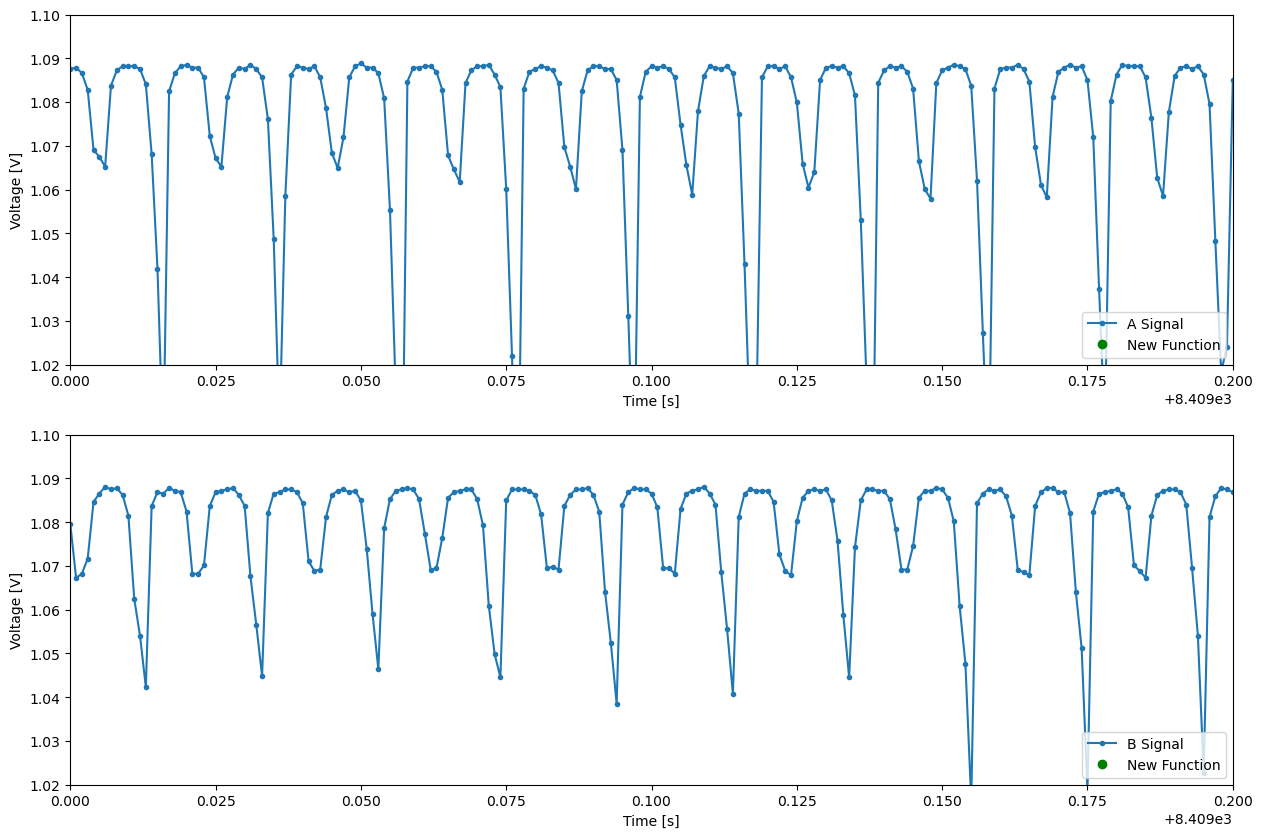

In [10]:
function = 'old'

if function == 'new':
    time_indexA, time_indexB, time_indexZ = time_indexA_new, time_indexB_new, time_indexZ_new
    time_stampsA, time_stampsB, time_stampsZ = time_stampsA_new, time_stampsB_new, time_stampsZ_new
elif function == 'old':
    time_indexA, time_indexB, time_indexZ = time_indexA_old, time_indexB_old, time_indexZ_old
    time_stampsA, time_stampsB, time_stampsZ = time_stampsA_old, time_stampsB_old, time_stampsZ_old

fig = plt.figure(figsize=[15,10])
plt.subplot(211)
#plt.plot(df_reduced['time'], Adata, alpha= 0.8, label ='A signal')
#plt.plot(df_reduced['time'], filteredA, '.-',alpha= 1, label ='A filtered')
#plt.plot(df_reduced['time'], Zdata, alpha= 0.8, label ='Z signal')
plt.plot(df_signal['time'], df_signal['A'], '.-',alpha= 1, label ='A Signal')
#plt.axhline(y=-0.25)
#plt.axhline(y=1.09)

plt.plot(df_signal['time'].to_numpy()[time_indexA+start], df_signal['A'].to_numpy()[time_indexA+start], 'go', alpha= 1, label = 'New Function')
#plt.plot(df_signal['time'].to_numpy()[time_indexA2+start], df_signal['A'].to_numpy()[time_indexA2+start], 'ro', alpha= 0.5, label = 'Old Function')
#plt.plot(df_signal['time'].to_numpy()[time_indexA3+start], df_signal['A'].to_numpy()[time_indexA3+start], 'ro', alpha= 1)
#plt.plot(df_reduced['time'], filteredB, '.-', alpha= 1, label ='B filtered')
plt.legend(loc='lower right')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.xlim([8409, 8409.2])
plt.ylim([1.02, 1.1])

plt.subplot(212)

plt.plot(df_signal['time'], df_signal['B'], '.-',alpha= 1, label ='B Signal')
#plt.axhline(y=-0.25)
#plt.axhline(y=1.09)

plt.plot(df_signal['time'].to_numpy()[time_indexB+start], df_signal['B'].to_numpy()[time_indexB+start], 'go', alpha= 1, label = 'New Function')
#plt.plot(df_signal['time'].to_numpy()[time_indexB2+start], df_signal['B'].to_numpy()[time_indexB2+start], 'ro', alpha= 0.5, label = 'Old Function')
#plt.plot(df_signal['time'].to_numpy()[time_indexA3+start], df_signal['A'].to_numpy()[time_indexA3+start], 'ro', alpha= 1)
#plt.plot(df_reduced['time'], filteredB, '.-', alpha= 1, label ='B filtered')
plt.legend(loc='lower right')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.xlim([8409, 8409.2])
plt.ylim([1.02, 1.1])

#plt.title(f'{filename} filtered {bandAB} Hz')
plt.show()

In [11]:
periodoA,freqA=lib_bbmdev.time2freq(time_stampsA)
target_freqA = target_freq*128
try:
    if target_freqA == 0.8*128:
        stable_indexA = np.where((freqA>0.955*target_freqA)&(freqA<1.01*target_freqA))[0]
    else:
        stable_indexA = np.where((freqA>target_freqA)&(freqA<1.01*target_freqA))[0]
    stable_strA = time_stampsA[1:][stable_indexA[0]]
    stable_finA = time_stampsA[1:][stable_indexA[-1]]
except:
    stable_strA = np.inf
    stable_finA = np.inf


periodoB,freqB=lib_bbmdev.time2freq(time_stampsB)
target_freqB = target_freq*128
try:
    if target_freqB == 0.8*128:
        stable_indexB = np.where((freqB>0.955*target_freqB)&(freqB<1.01*target_freqB))[0]
    else:
        stable_indexB = np.where((freqB>target_freqB)&(freqB<1.01*target_freqB))[0]
    stable_strB = time_stampsB[1:][stable_indexB[0]]
    stable_finB = time_stampsB[1:][stable_indexB[-1]]
except:
    stable_strB = np.inf
    stable_finB = np.inf


periodoZ,freqZ=lib_bbmdev.time2freq(time_stampsZ)
target_freqZ = target_freq
try:
    if target_freqZ == 0.8:
        stable_indexZ = np.where((freqZ>0.955*target_freqZ)&(freqZ<1.01*target_freqZ))[0]
    else:
        stable_indexZ = np.where((freqZ>target_freqZ)&(freqZ<1.01*target_freqZ))[0]
    stable_strZ = time_stampsZ[1:][stable_indexZ[0]]
    stable_finZ = time_stampsZ[1:][stable_indexZ[-1]]
except:
    stable_strZ = np.inf
    stable_finZ = np.inf



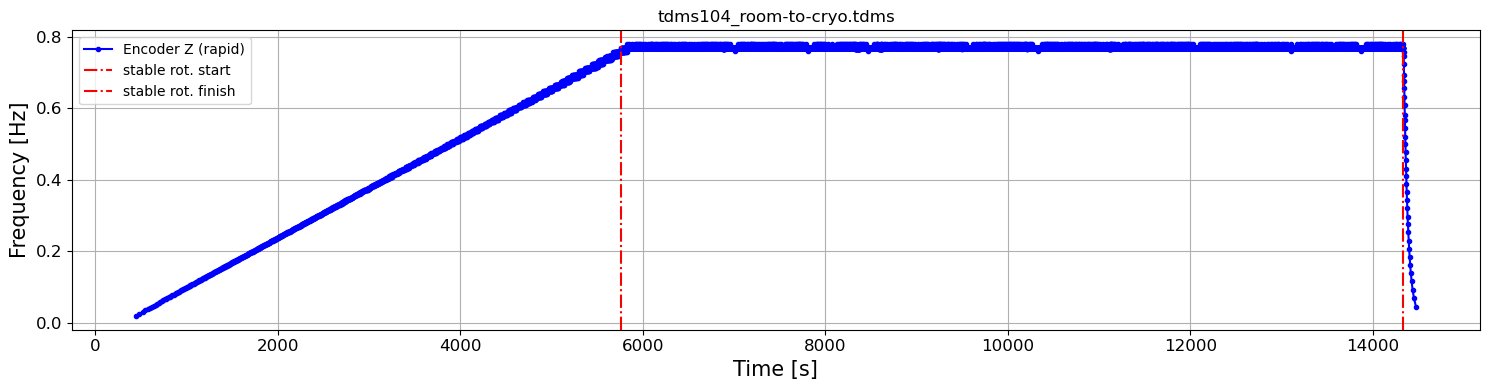

In [12]:
fig = plt.figure(figsize = (15,4))
ax = fig.add_subplot(111)
ax.plot(time_stampsZ[1:],freqZ,'b.-',label = 'Encoder Z (rapid)') # frequency
ax.axvline(x = stable_strZ,c = 'r',ls='-.',label = 'stable rot. start') # vertical line at the start
ax.axvline(x = stable_finZ,c = 'r',ls='-.',label = 'stable rot. finish') # vertical line at the finish
ax.grid()
ax.set_xlabel('Time [s]',fontsize = 15)
ax.set_ylabel(r'Frequency [Hz]', fontsize = 15)
ax.tick_params(labelsize = 12)
ax.legend()
#ax.set_ylim(0,1.1)
#ax.set_ylim(0.2,0.27)
#ax.set_xlim(2100,2900)
ax.set_title(filename)
plt.tight_layout()
#plt.savefig(
           #"./" + "frequency_Z.jpg",
           #dpi=130,
       #)
plt.show()

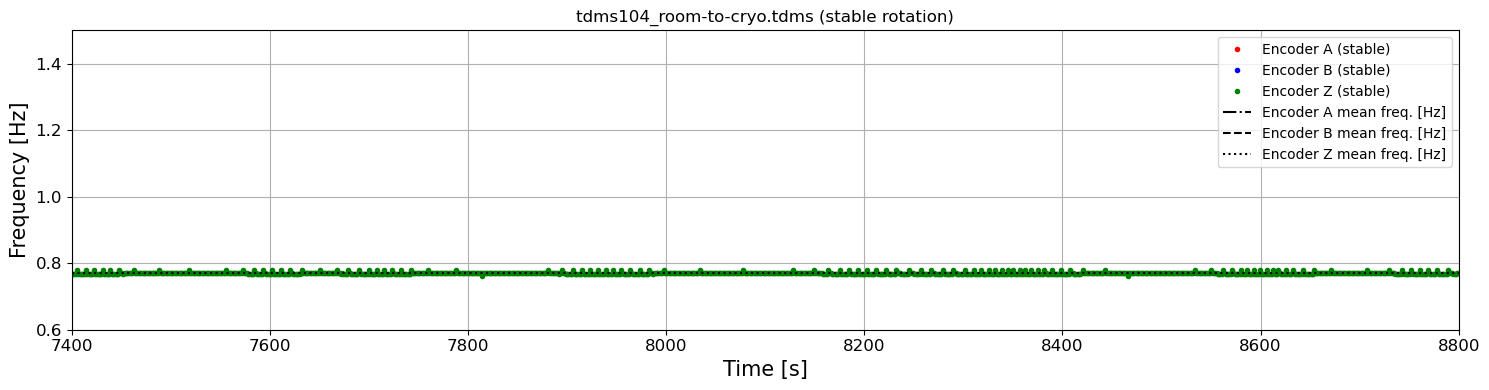

In [13]:
#plot frequencies 
lower_limits, upper_limits= [], []
for i in [stable_strZ,stable_strA, stable_strB]:
    if i != np.inf:
        lower_limits.append(i)
for i in [stable_finZ,stable_finA, stable_finB]:
    if i != np.inf:
        upper_limits.append(i)
fig = plt.figure(figsize = (15,4))
ax = fig.add_subplot(111)
ax.plot(time_stampsA[1:],freqA/128,'r.',alpha=1,label = 'Encoder A (stable)') # frequency
ax.plot(time_stampsB[1:],freqB/128,'b.', alpha = 1,label = 'Encoder B (stable)') # frequency
#ax.plot(time_stamps[1:],freq,'g.-',label = 'Encoder Z (stable)') # frequency
ax.plot(time_stampsZ[1:],freqZ,'g.',label = 'Encoder Z (stable)') # frequency
#ax.axvline(x = stable_strZ,c = 'r',ls='-.',label = 'stable rot. start') # vertical line at the start
#ax.axvline(x = stable_finZ,c = 'r',ls='-.',label = 'stable rot. finish') # vertical line at the finish
ax.axhline(y = np.mean(freqA/128),c = 'k',ls='-.',label = 'Encoder A mean freq. [Hz]') # vertical line at the finish
ax.axhline(y = np.mean(freqB/128),c = 'k',ls='--',label = 'Encoder B mean freq. [Hz]') # vertical line at the finish
ax.axhline(y = np.mean(freqZ[stable_index]),c = 'k',ls=':',label = 'Encoder Z mean freq. [Hz]') # vertical line at the finish
ax.grid()
ax.set_xlabel('Time [s]',fontsize = 15)
ax.set_ylabel(r'Frequency [Hz]', fontsize = 15)
ax.tick_params(labelsize = 12)
ax.legend()
#ax.set_ylim(0,1.1)
ax.set_ylim(0.6,1.5)
#ax.set_xlim([np.max(lower_limits), np.min(upper_limits)]) #this defines where all three encoders are stable
plt.xlim([7400, 8800])
ax.set_title(f'{filename} (stable rotation)')
plt.tight_layout()
#plt.savefig(
           #"./" + "frequency.jpg",
           #dpi=130,
       #)
plt.show()

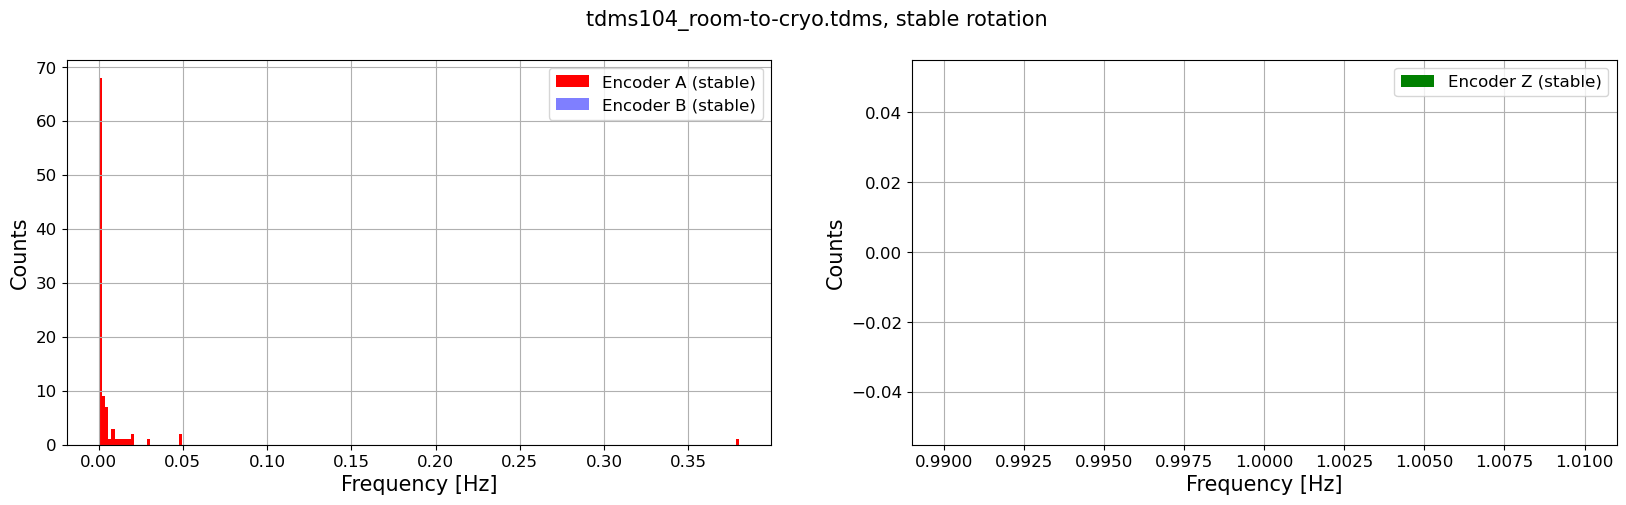

In [14]:
fig = plt.figure(figsize=(20,5))
fig.suptitle(f'{filename}, stable rotation',fontsize=15)
plt.subplot(121)
plt.hist(freqA/128, bins=200, color = 'r', label = 'Encoder A (stable)')
plt.hist(freqB/128, bins=200, color = 'b', label = 'Encoder B (stable)', alpha = 0.5)
plt.xlabel('Frequency [Hz]', fontsize =15)
plt.ylabel('Counts', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.subplot(122)
plt.hist(freqZ[stable_index], bins=500,range=[0.99,1.01], color = 'g', label = 'Encoder Z (stable)')
plt.xlabel('Frequency [Hz]', fontsize =15)
plt.ylabel('Counts', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
#plt.savefig(
           #"./" + "frequency_hist.jpg",
           #dpi=130,
       #)
plt.show()


In [15]:
np.mean(freqA)/128, np.mean(freqB)/128, np.mean(freqZ[stable_index]), np.std(freqA/128), np.std(freqB)/128, np.std(freqZ[stable_index])

(0.007582193196048004,
 0.00029700854200244767,
 0.7701780267952661,
 0.03848566271997822,
 0.0006933446111092239,
 0.0031295423530845272)

In [18]:
report = open("results.txt", "w")
report.write("Encoder, Mean Frequency [Hz], Std. Dev. [Hz], Low TH, High TH")
report.write('\n')
report.write(f'A, {np.mean(freqA)/128}, {np.std(freqA)/128}, {low_thA}, {high_thA}')
#report.write(f'A, -, -, -, -')
report.write('\n')
report.write(f'B, {np.mean(freqB)/128}, {np.std(freqB)/128}, {low_thB}, {high_thB}')
#report.write(f'B, -, -, -, -')
report.write('\n')
report.write(f'Z, {np.mean(freqZ[stable_index])}, {np.std(freqZ[stable_index])}, {low_th}, {high_th}')
report.close()

In [16]:
df_reduced = df_signal[start:fin]
df_reduced

,time,Iu,Iv,Iw,A,B,Z,H,Count,Vu,Vv,Vw
5787157,5787.157,-0.025464,0.278338,-0.244331,1.088553,1.081180,1.086902,0.112635,-10.380818,-1.231791,1.083207,0.543164
5787158,5787.158,-0.074647,0.294457,-0.210856,1.088872,1.065701,1.089130,0.112635,-10.380818,-1.247224,0.939159,0.784959
5787159,5787.159,-0.121595,0.302359,-0.172917,1.088553,1.060331,1.089448,0.113584,-10.380818,-1.257512,0.728232,1.006175
5787160,5787.160,-0.166626,0.302043,-0.128282,1.085045,1.055593,1.089448,0.111370,-10.380818,-1.231791,0.450426,1.109067
5787161,5787.161,-0.206229,0.292877,-0.081098,1.069738,1.085602,1.090085,0.115798,-10.380818,-1.200924,0.126319,1.155368
...,...,...,...,...,...,...,...,...,...,...,...,...
14335866,14335.866,-0.000872,0.004944,0.004026,1.066230,1.081811,-0.771955,0.113900,-10.380818,-0.002279,0.013139,0.008128
14335867,14335.867,-0.001511,0.005260,0.003707,1.064635,1.084338,-0.689530,0.113268,-10.380818,0.008009,0.002850,0.002983
14335868,14335.868,-0.001192,0.005260,0.004345,1.064954,1.084970,-0.622699,0.112319,-10.380818,0.008009,0.007995,0.002983
14335869,14335.869,-0.001511,0.004628,0.004026,1.079305,1.085286,-0.587692,0.114849,-10.380818,0.002865,0.002850,-0.002161


In [32]:
# columns array
plot_col = ["r","b","g"]
#U_lab = [df_signal.columns[1],df_signal.columns[8]]
U_lab = [df_reduced.columns[4],df_reduced.columns[6]]
print(U_lab)

['A', 'Z']


In [33]:
chunk_size = 2000
window_size=2000
#chunks = [df_signal['time'].iloc[i:i + chunk_size] fo\r i in range(0, len(df_signal), 100)]
chunks_time = [df_reduced['time'].iloc[i:i + chunk_size] for i in range(0, len(df_reduced), window_size)]
chunks_signal_I = [df_reduced[U_lab[0]].iloc[i:i + chunk_size] for i in range(0, len(df_reduced), window_size)]# そのままデータ数を増やすとforが終わらない
chunks_signal_V = [df_reduced[U_lab[1]].iloc[i:i + chunk_size] for i in range(0, len(df_reduced), window_size)]# そのままデータ数を増やすとforが終わらない
print(chunks_signal_I[0])
print(len(chunks_signal_I[0]))
print(chunks_signal_I[1])
print(len(chunks_signal_I[1]))

5787157    1.088553
5787158    1.088872
5787159    1.088553
5787160    1.085045
5787161    1.069738
             ...   
5789152    1.088872
5789153    1.086639
5789154    1.080580
5789155    1.067505
5789156    1.062084
Name: A, Length: 2000, dtype: float64
2000
5789157    1.063041
5789158    1.085045
5789159    1.087915
5789160    1.088553
5789161    1.088234
             ...   
5791152    1.087277
5791153    1.088872
5791154    1.088553
5791155    1.088872
5791156    1.088872
Name: A, Length: 2000, dtype: float64
2000


In [34]:
len(chunks_signal_I), len(df_reduced)/2000

(4275, 4274.357)

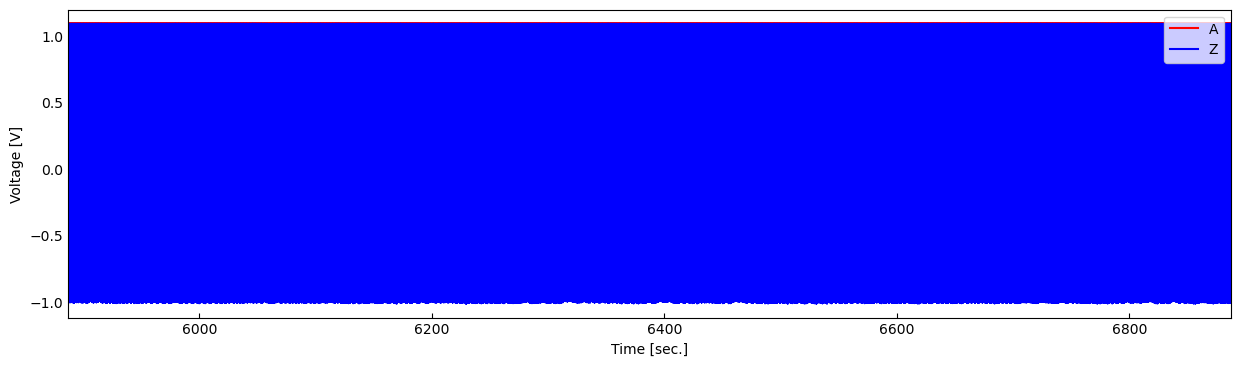

In [35]:
f_s = 1000
initial_time = 100*f_s
time_window:int = 1000*f_s
x_data = df_reduced['time'][initial_time:time_window+initial_time:2]
fig, ax = plt.subplots(1, 1, figsize=(15, 4))

plot_data = [
    df_reduced[U_lab[0]][initial_time:time_window+initial_time:2],df_reduced[U_lab[1]][initial_time:time_window+initial_time:2]]
# Call the function with common time_data, multiple data arrays, and specified colors
lib_bbmdev.plot_multiple_arrays_with_time_and_color(
    ax,
    x_data,
    plot_data,
    labels=U_lab,
    plot_col=plot_col,
)
# Customize the plot
lib_bbmdev.layout_coil_current_voltage(ax, "Time [sec.]", "Voltage [V]")
ax.autoscale(enable=True, axis="x", tight=True)
ax.autoscale(enable=True, axis="y", tight=False)
plt.legend(loc="upper right")

sampling time :  0.000999999999999898


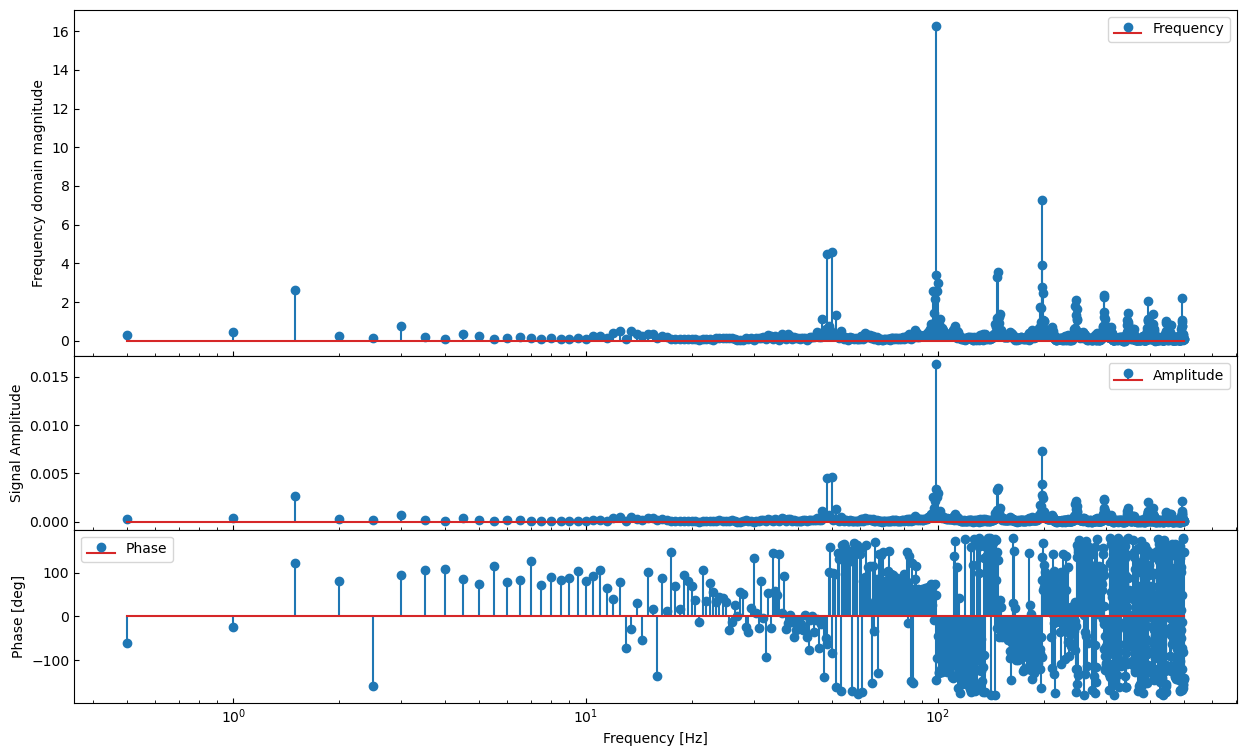

{'frequency': 98.50000000001003, 'amplitude': 0.016283336057677695, 'degree': 48.27620203868389}
5837157    5837.157
5837158    5837.158
5837159    5837.159
5837160    5837.160
5837161    5837.161
             ...   
5839152    5839.152
5839153    5839.153
5839154    5839.154
5839155    5839.155
5839156    5839.156
Name: time, Length: 2000, dtype: float64


In [36]:
chunk_number = 25

dt_s = abs(chunks_time[chunk_number].iloc[-1] - chunks_time[chunk_number].iloc[0]) / (len(chunks_time[chunk_number]) - 1) # sampling spacing calculated from time array
print('sampling time : ',dt_s)
y_fft,freqs,Amp_arr,Deg_arr = lib_bbmdev.fft_specgram([chunks_signal_I[chunk_number]],len(chunks_signal_I[chunk_number]),dt=dt_s,plot=True)

for i in range(0,len(y_fft),1):
    argmax_I,frequency,amp,deg_I = lib_bbmdev.fft_argmax(freqs,Amp_arr[i],Deg_arr[i],print_output=True)

print(chunks_time[chunk_number])

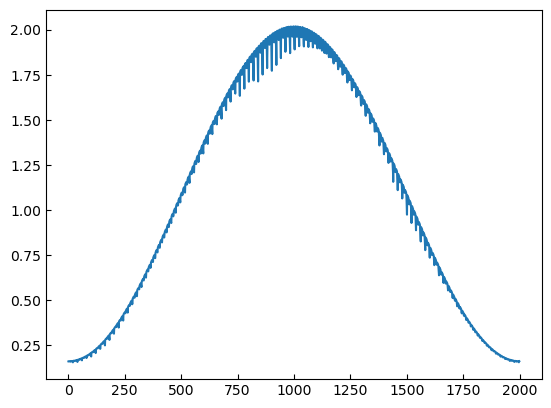

In [37]:
# hamming window
window = np.hamming(chunk_size+1)[:-1]
acf = 1/(sum(window)/(len(chunks_signal_I[chunk_number])+1)) #Amplitude Correction Factorを計算
slices_I = chunks_signal_I[:-11]
slices_V = chunks_signal_V[:-11]
chunks_signal_I_window = slices_I * window * acf # 全スライスに窓を掛け合わせる
chunks_signal_V_window = slices_V * window * acf
plt.plot(np.arange(0,len(chunks_signal_I_window[200])),chunks_signal_I_window[200])

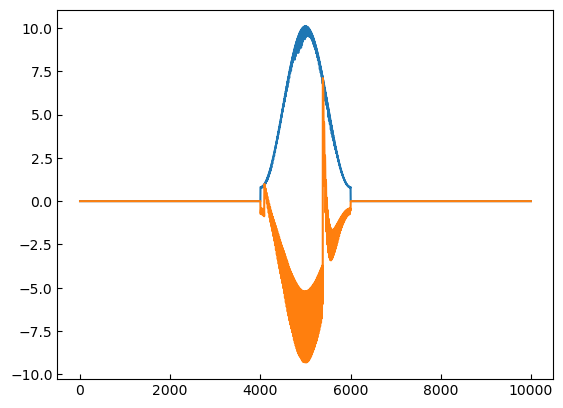

In [38]:
chunks_signal_I_padded = []
chunks_signal_V_padded = []
# zero padding
for chunk in chunks_signal_I_window:
    _chunks_signal_I_padded = np.pad(chunk, (4000, 4000), mode='constant') # for high frequency resolution
    acf = (sum(np.abs(chunk)) / len(chunk)) / (sum(np.abs(_chunks_signal_I_padded)) / len(_chunks_signal_I_padded))
    _chunks_signal_I_padded = _chunks_signal_I_padded*acf
    chunks_signal_I_padded.append(_chunks_signal_I_padded)

for chunk in chunks_signal_V_window:
    _chunks_signal_V_padded = np.pad(chunk, (4000, 4000), mode='constant') # for high frequency resolution
    acf = (sum(np.abs(chunk)) / len(chunk)) / (sum(np.abs(_chunks_signal_V_padded)) / len(_chunks_signal_V_padded))
    _chunks_signal_V_padded = _chunks_signal_V_padded*acf
    chunks_signal_V_padded.append(_chunks_signal_V_padded)

plt.plot(np.arange(0,len(chunks_signal_I_padded[200])),chunks_signal_I_padded[200])
plt.plot(np.arange(0,len(chunks_signal_V_padded[200])),chunks_signal_V_padded[200])

In [41]:
def fft_specgram(y_arr, N, dt, plot = False):
    """
    Compute the frequency, amplitude, and phase angle (in degrees) components of the FFT of a given signal.

    Parameters:
        y_arr (array_like): Input signal array.
        N (int): Number of data points in the signal.
        dt (float): Time step between consecutive data points in the signal.
        plot (bool, optional): Whether to plot the FFT components. Default is False.

    Returns:
        tuple: A tuple containing:
            y_fft_nyq (ndarray): FFT components up to Nyquist frequency.
            freq_nyq (ndarray): Array of frequency values corresponding to the FFT components up to Nyquist frequency.
            Amp_arr_nyq (ndarray): Array of amplitudes of the FFT components up to Nyquist frequency.
            Deg_arr_nyq (ndarray): Array of phase angles (in degrees) of the FFT components up to Nyquist frequency.
    """
    # Compute the FFT of the input signal
    y_fft = np.fft.fft(y_arr)
    y_fft_nyq = [buf[1:int(N / 2)] for buf in y_fft]

    # Compute the frequencies corresponding to the FFT components
    freq = np.fft.fftfreq(N, d=dt)
    freq_nyq = freq[1:int(N / 2)]

    # Compute the amplitude of each FFT component
    Amp_arr = abs(y_fft / (N / 2))
    Amp_arr_nyq = [buf[1:int(N / 2)] for buf in Amp_arr]

    # Compute the phase angle (in degrees) of each FFT component
    Deg_arr = np.angle(y_fft, deg=True)
    Deg_arr_nyq = [buf[1:int(N / 2)] for buf in Deg_arr]

    if plot == False:
        pass
    else:
        plt.rcParams['xtick.direction'] = 'in'
        plt.rcParams['ytick.direction'] = 'in'
        fig = plt.figure(figsize=(15, 9))
        # グリッドの設定 (3行, 1列)
        gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1], hspace=0.0)

        # Frequency domain magnitude
        ax0 = plt.subplot(gs[0])
        ax0.stem(freq_nyq, abs(y_fft_nyq[0]),label='Frequency')
        ax0.legend()
        #ax0.set_xlim(0,15)
        #ax0.set_ylim(0,100)
        ax0.set_ylabel('Frequency domain magnitude')
        #ax0.set_ylim(0, max(y_fft[1:int(N / 2)])+1)

        # Amplitude
        ax1 = plt.subplot(gs[1], sharex=ax0)
        ax1.stem(freq_nyq, Amp_arr_nyq[0],label='Amplitude')
        ax1.legend()
        #ax1.set_ylim(0,0.1)
        ax1.set_xscale('log')
        ax1.set_ylabel('Signal Amplitude')

        # Phase
        ax2 = plt.subplot(gs[2], sharex=ax0)
        ax2.stem(freq_nyq, Deg_arr_nyq[0],label='Phase')
        ax2.legend()
        ax2.set_xscale('log')
        ax2.set_ylabel('Phase [deg]')
        ax2.set_xlabel('Frequency [Hz]')

        plt.show()

    return y_fft_nyq,freq_nyq, Amp_arr_nyq, Deg_arr_nyq

In [45]:
len(chunks_time)

4275

sampling time :  0.000999999999999898


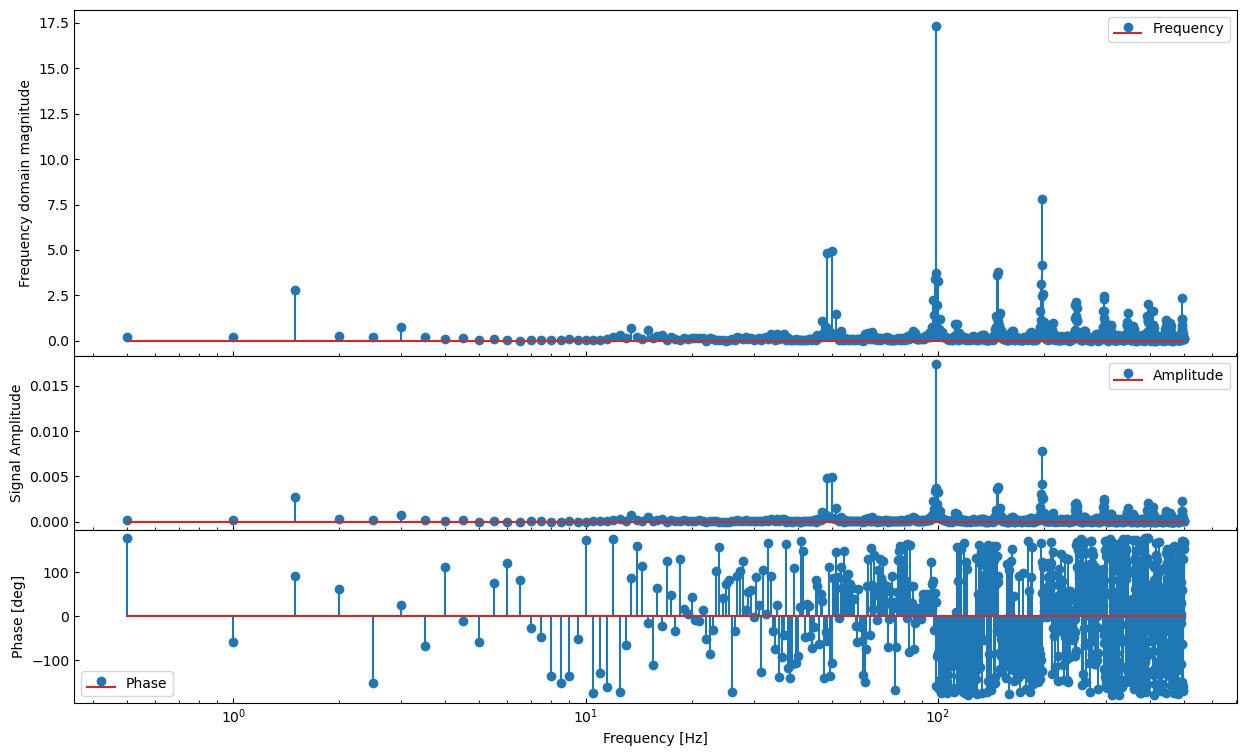

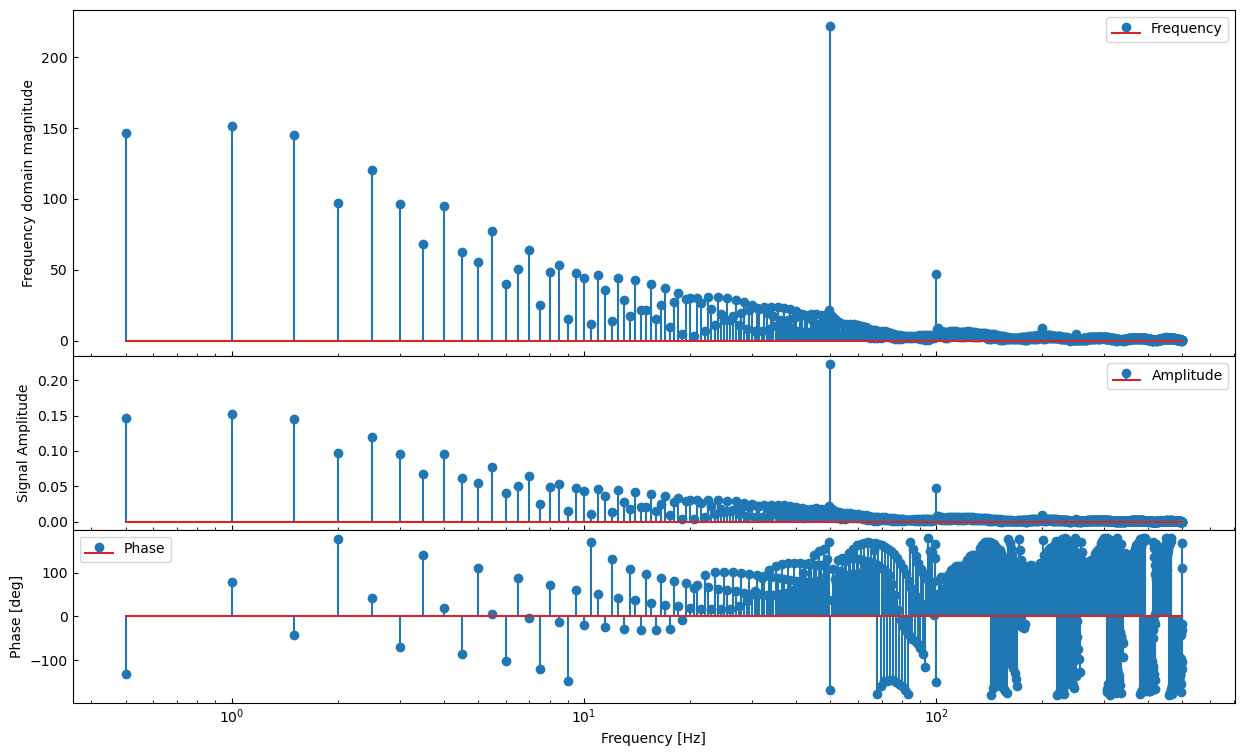

In [47]:
# fft
#chunk_number = chunk_number
chunk_number2 = 4200
dt_s = abs(chunks_time[0].iloc[-1] - chunks_time[0].iloc[0]) / (len(chunks_time[0]) - 1) # sampling spacing calculated from time array
print('sampling time : ',dt_s)

#fft_I,freqs_I,Amp_arr_I,Deg_arr_I = fft_specgram(chunks_signal_I_padded,len(chunks_signal_I_padded[0]),dt=dt_s,plot=True)
#fft_V,freqs_V,Amp_arr_V,Deg_arr_V = fft_specgram(chunks_signal_V_padded,len(chunks_signal_V_padded[0]),dt=dt_s,plot=True)
fft_I,freqs_I,Amp_arr_I,Deg_arr_I = fft_specgram([chunks_signal_I[chunk_number2]],len(chunks_signal_I[chunk_number2]),dt=dt_s,plot=True)
fft_V,freqs_V,Amp_arr_V,Deg_arr_V = fft_specgram([chunks_signal_V[chunk_number2]],len(chunks_signal_V[chunk_number2]),dt=dt_s,plot=True)

In [ ]:
#relative_phase
U_IV = []
relative_phase_U = []
from tqdm import tqdm
for chunk_num in tqdm(range(0,len(fft_I),1), desc="Calculating phase..."):
    IV_chunk = slices_I[chunk_num]*slices_V[chunk_num]
    IV_average = np.average(IV_chunk)
    U_IV.append(IV_average)

    argmax_I,frequency,amp,deg_I = lib_bbmdev.fft_argmax(freqs_I,Amp_arr_I[chunk_num],Deg_arr_I[chunk_num],print_output=False)
    argmax,frequency,amp,deg_V = lib_bbmdev.fft_argmax(freqs_V,Amp_arr_V[chunk_num],Deg_arr_V[chunk_num],argmax=argmax_I,print_output=False)
    relative_phase_U.append(np.abs(deg_V-deg_I))

    if chunk_num % 50 == 0:
        fig, ax = plt.subplots(1, 1, figsize=(15, 4))

        plot_data = [
            slices_I[chunk_num],
            slices_V[chunk_num],
            IV_chunk,
        ]
        plot_labels = ["U_I", "U_V", "U_I*V)", "Average"]
        plot_col = ["r", "b", "g", "black"]
        # Call the function with common time_data, multiple data arrays, and specified colors
        lib_bbmdev.plot_multiple_arrays_with_time_and_color(
            ax,
            chunks_time[chunk_num],
            plot_data,
            labels=plot_labels,
            plot_col=plot_col,
        )
        # Customize the plot
        lib_bbmdev.layout_coil_current_voltage(ax, "Time [sec.]", "Current [A]")
        ax.set_title("t="+str(int(chunks_time[chunk_num].iloc[0]))+" sec")
        ax.autoscale(enable=True, axis="x", tight=True)
        ax.autoscale(enable=True, axis="y", tight=False)
        plt.legend(loc="upper right")
        plt.tight_layout()
        plt.savefig(
            "./" + str(int(chunks_time[chunk_num].iloc[0])) + "_waveform.jpg",
            dpi=130,
        )
        plt.close()

Calculating phase...: 100%|██████████| 4215/4215 [01:09<00:00, 60.78it/s]


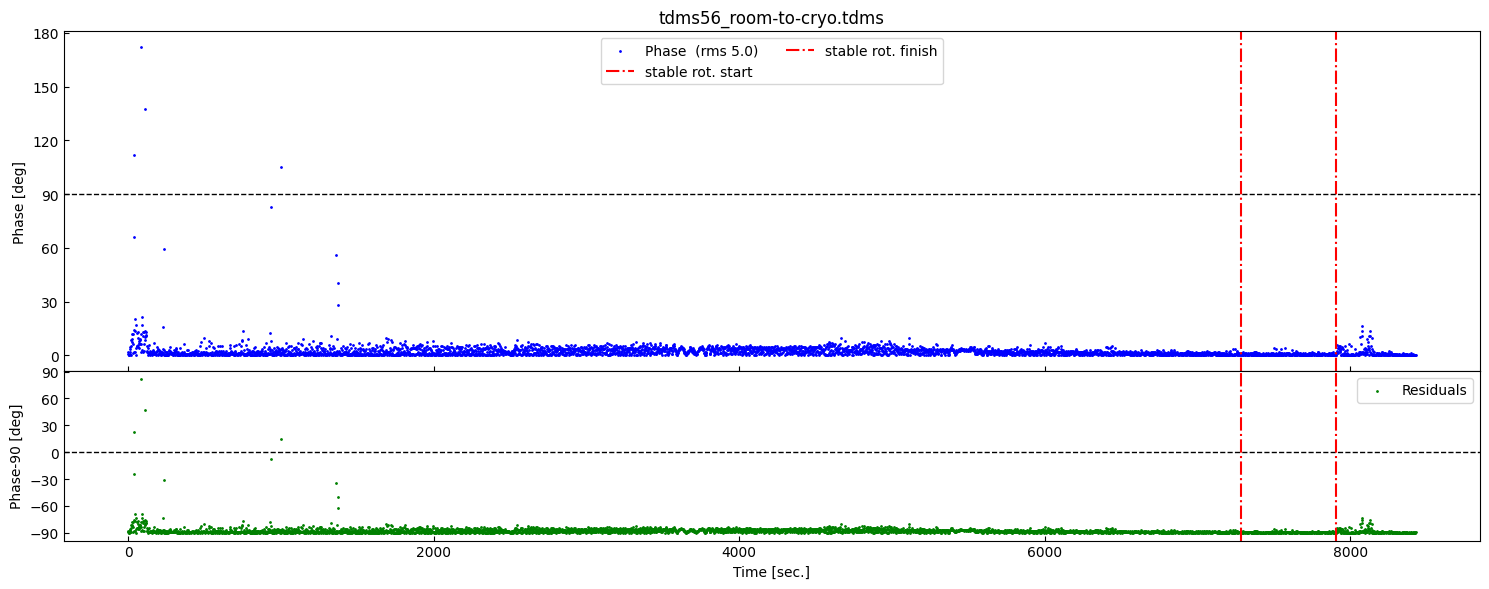

In [ ]:
# phase plot
from matplotlib.ticker import MultipleLocator
y_data = np.array(relative_phase_U)
for i in range(len(y_data)):
    if y_data[i] >180:
        y_data[i]=360-y_data[i]
x_data = np.arange(0, len(y_data) * chunk_size / f_s, chunk_size / f_s) #+cut_time
rms_y = np.std(y_data)

# FigureとAxesの作成
fig = plt.figure(figsize=(15, 6))

# グリッドの設定 (2行, 1列)
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.0)

# 上のsubplot: フィット結果の関数とデータ点のプロット
ax0 = plt.subplot(gs[0])
plt.gca().yaxis.set_major_locator(MultipleLocator(30))
# ax0.plot(x_data, y_data,"b.-", label='Data Points')
ax0.scatter(
    x_data, y_data, s=1, c="b", label="Phase  (rms " + str(round(rms_y, 2)) + ")"
)
ax0.axvline(
    x=stable_str, c="r", ls="-.", label="stable rot. start"
)  # vertical line at the start
ax0.axvline(
    x=stable_fin, c="r", ls="-.", label="stable rot. finish"
)  # vertical line at the finish
ax0.axhline(90, color="black", linestyle="--", linewidth=1)
ax0.legend(ncol=2)
ax0.set_ylabel("Phase [deg]")
#ax0.set_ylim(0, 180)
ax0.set_title(filename)


# 下のsubplot: フィット結果の関数とデータ点の差分プロット
ax1 = plt.subplot(gs[1], sharex=ax0)  # x軸を共有
plt.gca().yaxis.set_major_locator(MultipleLocator(30))
residuals = y_data - 90.0
ax1.scatter(x_data, residuals, s=1, c="g", label="Residuals")
ax1.axhline(0, color="black", linestyle="--", linewidth=1)
ax1.axvline(
    x=stable_str, c="r", ls="-."
)  # ,label = 'stable rot. start') # vertical line at the start
ax1.axvline(
    x=stable_fin, c="r", ls="-."
)  # ,label = 'stable rot. finish') # vertical line at the finish
lib_bbmdev.layout_coil_current_voltage(ax1, "Time [sec.]", "Phase-90 [deg]")
ax1.legend()
#ax1.set_ylim(-90, 89)
# ax1.set_xlim(0,10000)

# 上のsubplotのx軸ラベルを非表示にする
plt.tight_layout()
plt.setp(ax0.get_xticklabels(), visible=False)
plt.savefig(
    "./" + "relative_phase_difference_U.jpg",
    dpi=130,
)
# グラフの表示
plt.show()

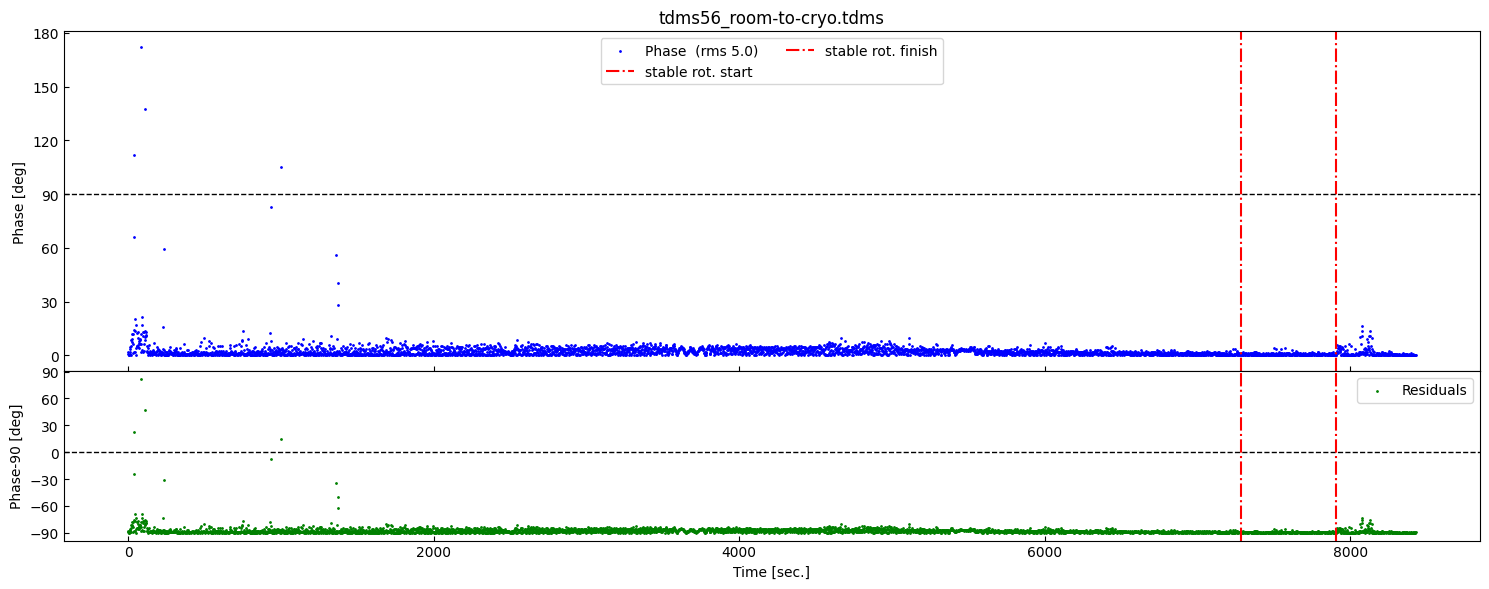

In [ ]:
# phase plot
from matplotlib.ticker import MultipleLocator
y_data = np.array(relative_phase_U)
for i in range(len(y_data)):
    if y_data[i] >180:
        y_data[i]=360-y_data[i]
x_data = np.arange(0, len(y_data) * chunk_size / f_s, chunk_size / f_s) #+cut_time
rms_y = np.std(y_data)

# FigureとAxesの作成
fig = plt.figure(figsize=(15, 6))

# グリッドの設定 (2行, 1列)
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1], hspace=0.0)

# 上のsubplot: フィット結果の関数とデータ点のプロット
ax0 = plt.subplot(gs[0])
plt.gca().yaxis.set_major_locator(MultipleLocator(30))
# ax0.plot(x_data, y_data,"b.-", label='Data Points')
ax0.scatter(
    x_data, y_data, s=1, c="b", label="Phase  (rms " + str(round(rms_y, 2)) + ")"
)
ax0.axvline(
    x=stable_str, c="r", ls="-.", label="stable rot. start"
)  # vertical line at the start
ax0.axvline(
    x=stable_fin, c="r", ls="-.", label="stable rot. finish"
)  # vertical line at the finish
ax0.axhline(90, color="black", linestyle="--", linewidth=1)
ax0.legend(ncol=2)
ax0.set_ylabel("Phase [deg]")
#ax0.set_ylim(0, 180)
ax0.set_title(filename)


# 下のsubplot: フィット結果の関数とデータ点の差分プロット
ax1 = plt.subplot(gs[1], sharex=ax0)  # x軸を共有
plt.gca().yaxis.set_major_locator(MultipleLocator(30))
residuals = y_data - 90.0
ax1.scatter(x_data, residuals, s=1, c="g", label="Residuals")
ax1.axhline(0, color="black", linestyle="--", linewidth=1)
ax1.axvline(
    x=stable_str, c="r", ls="-."
)  # ,label = 'stable rot. start') # vertical line at the start
ax1.axvline(
    x=stable_fin, c="r", ls="-."
)  # ,label = 'stable rot. finish') # vertical line at the finish
lib_bbmdev.layout_coil_current_voltage(ax1, "Time [sec.]", "Phase-90 [deg]")
ax1.legend()
#ax1.set_ylim(-90, 89)
#ax1.set_xlim(7800,9100)
#ax1.set_xlim(0,2000)

# 上のsubplotのx軸ラベルを非表示にする
plt.tight_layout()
plt.setp(ax0.get_xticklabels(), visible=False)

'''plt.savefig(
    "./" + "relative_phase_difference_U.jpg",
    dpi=130,
)
'''
# グラフの表示
plt.show()

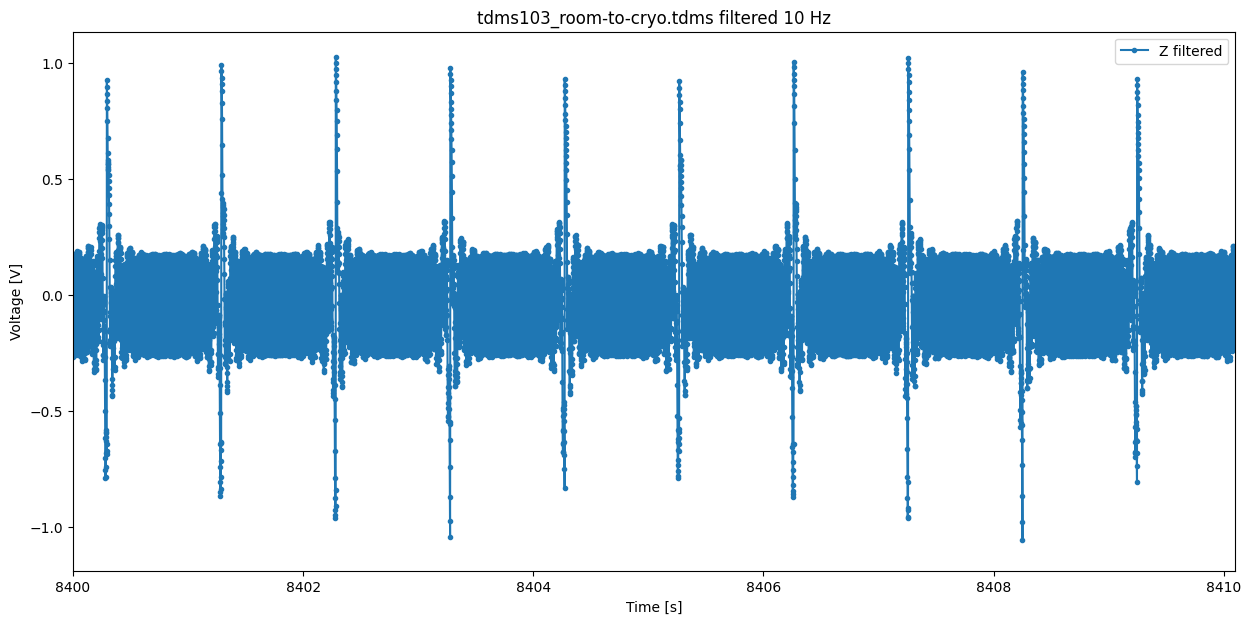

In [ ]:
import scipy.signal

def lowpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 10):
    sos = scipy.signal.butter(poles, cutoff, 'lowpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

def highpass(data: np.ndarray, cutoff: float, sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, cutoff, 'highpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

def bandpass(data: np.ndarray, edges: list[float], sample_rate: float, poles: int = 5):
    sos = scipy.signal.butter(poles, edges, 'bandpass', fs=sample_rate, output='sos')
    filtered_data = scipy.signal.sosfiltfilt(sos, data)
    return filtered_data

# Load sample data from a WAV file
#sample_rate, data = scipy.io.wavfile.read('ecg.wav')
#times = np.arange(len(data))/sample_rate
Adata = df_reduced['A']
Bdata = df_reduced['B']
Zdata = df_reduced['Z']
bandZ = 10
bandAB = [127, 129]
# Apply a 50 Hz low-pass filter to the original data
#filtered = bandpass(data, [20,40], 1000)
filteredA = bandpass(Adata, bandAB, 1000)
filteredZ = lowpass(Zdata, bandZ, 1000)
filteredB = bandpass(Bdata, bandAB, 1000)
# Code used to display the result
fig = plt.figure(figsize=[15,7])
#plt.plot(df_reduced['time'], Adata, alpha= 0.8, label ='A signal')
#plt.plot(df_reduced['time'], filteredA, '.-',alpha= 1, label ='A filtered')
#plt.plot(df_reduced['time'], Zdata, alpha= 0.8, label ='Z signal')
plt.plot(df_reduced['time'], Zdata-filteredZ, '.-',alpha= 1, label ='Z filtered')
#plt.plot(df_reduced['time'], Bdata, alpha= 0.8, label ='B signal')
#plt.plot(df_reduced['time'], filteredB, '.-', alpha= 1, label ='B filtered')
plt.legend(loc='upper right')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.xlim([8400, 8410.1])
#plt.ylim([-0.003, 0.003])
plt.title(f'{filename} filtered {bandZ} Hz')
plt.show()

In [ ]:
np.std(Adata-filteredA)

0.00879858363527506

In [ ]:
dt = df_reduced['time'].to_numpy()[1]-df_reduced['time'].to_numpy()[0]
dt

0.0010000000002037268

In [ ]:
#8820.000-7281.304
df_reduced['time'].to_numpy()[-1]-df_reduced['time'].to_numpy()[0]

1538.696

In [ ]:
len(df_reduced['time'])

1538697

In [ ]:
df_reduced['time']

7281304    7281.304
7281305    7281.305
7281306    7281.306
7281307    7281.307
7281308    7281.308
             ...   
8819996    8819.996
8819997    8819.997
8819998    8819.998
8819999    8819.999
8820000    8820.000
Name: time, Length: 1538697, dtype: float64

In [ ]:
z_fft,zfreqs,zAmp_arr,zDeg_arr = fft_specgram([filteredZ], len(filteredZ),dt=dt,plot=False)
1538, 3077, 4616, 15386

In [ ]:
zfreqs[1530:1550], zAmp_arr[0][1530:1550]

(array([0.99499772, 0.99564762, 0.99629752, 0.99694742, 0.99759732,
        0.99824722, 0.99889712, 0.99954702, 1.00019692, 1.00084682,
        1.00149672, 1.00214662, 1.00279652, 1.00344642, 1.00409632,
        1.00474622, 1.00539612, 1.00604602, 1.00669592, 1.00734583]),
 array([0.00166698, 0.00176537, 0.00188855, 0.00206356, 0.00224787,
        0.00239611, 0.00267733, 0.00301361, 0.00335067, 0.00382078,
        0.00461348, 0.00534518, 0.00682226, 0.00898355, 0.01317126,
        0.02520272, 0.27065759, 0.03070098, 0.01448634, 0.00939982]))

In [ ]:
np.where(zAmp_arr[0]>0.05), zfreqs[8000]

((array([ 1546,  3093,  3094,  4640,  4641,  6187,  6188,  7734,  7735,
          9282, 10829, 12376, 13923], dtype=int64),),
 5.199854161261107)

1000


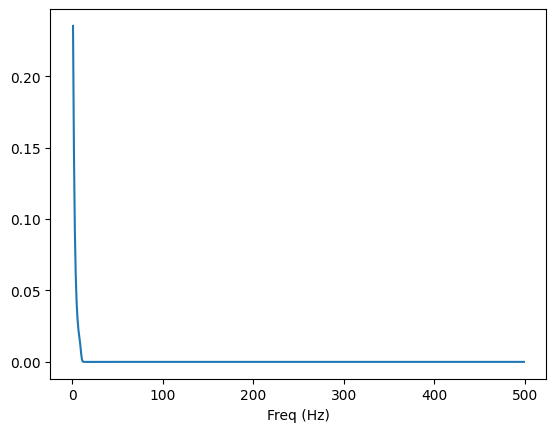

In [ ]:
x = filteredZ[1000:2000]
N = len(x)
y = np.fft.fft(x)
f = np.linspace(0.0,N-1.0,N);    # vector of frequencies for plotting
phi = np.angle(y, deg=True)
amp = np.real(y[:N//2])/(N/2)
print(len(y))
plt.plot(f[:N//2][1:], amp[1:])   # plotting half of the fft results
plt.xlabel('Freq (Hz)')           # labelling x-axis
#plt.xlim([0,50])
plt.show()

In [ ]:
#reconstruct Z
indices = np.where(zAmp_arr[0]>=0.01)[0]
amps = [zAmp_arr[0][:25000:]][0]
#amps = amp[1:]
phases = [zDeg_arr[0][:25000:]][0]
#phases = phi[1:]
frequencies = np.arange(1,11,1)
t = df_reduced['time'].to_numpy()[0:10000]
#z_fourier = -0.6*np.ones(len(t), dtype=np.complex_)
z_fourier1 = -0.7266405144364503*np.ones(len(t)) #0.622596229522827*
for i in range(1, len(amps)+1):
    z_fourier1+= amps[i-1]*np.cos(2*np.pi*i*(t)/1538.696-(360-phases[i-1])*np.pi/180)
    #z_fourier2+= amps[i-1]*np.cos(phases[i-1]*np.pi/180)*np.cos(2*np.pi*i*t/1.0054434333348197) + amps[i-1]*np.sin(phases[i-1]*np.pi/180)*np.sin(2*np.pi*i*t/1.0054434333348197)
    #z_fourier+=amps[i-1]*np.exp(2*np.pi*1j*i*t/1.0054434333348197)


In [ ]:
np.max(z_fourier1)

0.5829057910682147

In [ ]:
#rs_amp, rs_time = 0, 0
rs = 0
time_Z = 0
times = np.arange(0.400, 0.801, 0.001)
t = df_reduced['time'].to_numpy()[0:10000]
step = 1
for aa in times: 
      
    z_fourier1 = -0.7266405144364503*np.ones(len(t))
    for i in range(1, len(amps)+1):
        z_fourier1+= amps[i-1]*np.cos(2*np.pi*i*(t-aa)/1538.696-(360-phases[i-1])*np.pi/180)
    r = np.corrcoef(filteredZ[0:10000], z_fourier1)
    if abs(r[1,0]) > abs(rs):
        rs = r[1,0]
        time_Z = aa
    print(f'step {step}/{len(times)} done, {rs}, {time_Z}')
    step +=1 
print(rs, time_Z)

step 1/401 done, -0.104124518750975, 0.4
step 2/401 done, -0.104124518750975, 0.4
step 3/401 done, -0.104124518750975, 0.4
step 4/401 done, -0.104124518750975, 0.4
step 5/401 done, -0.104124518750975, 0.4
step 6/401 done, -0.104124518750975, 0.4
step 7/401 done, -0.104124518750975, 0.4
step 8/401 done, -0.104124518750975, 0.4
step 9/401 done, -0.104124518750975, 0.4
step 10/401 done, -0.104124518750975, 0.4
step 11/401 done, -0.104124518750975, 0.4
step 12/401 done, -0.104124518750975, 0.4
step 13/401 done, -0.104124518750975, 0.4
step 14/401 done, -0.104124518750975, 0.4
step 15/401 done, -0.104124518750975, 0.4
step 16/401 done, -0.104124518750975, 0.4
step 17/401 done, -0.104124518750975, 0.4
step 18/401 done, -0.104124518750975, 0.4
step 19/401 done, -0.104124518750975, 0.4
step 20/401 done, -0.104124518750975, 0.4
step 21/401 done, -0.104124518750975, 0.4
step 22/401 done, -0.104124518750975, 0.4
step 23/401 done, -0.104124518750975, 0.4
step 24/401 done, -0.104124518750975, 0.4
s

In [ ]:
len(np.arange(0.4, 0.8001, 0.001))

401

In [ ]:
tf = df_reduced['time'].to_numpy()[0:10000]

z_fourier1 = (-0.6551608932791014)*np.ones(len(tf))
for i in range(1, len(amps)+1):
    z_fourier1+= amps[i-1]*np.cos(2*np.pi*i*(tf-time_Z)/1538.696-(360-phases[i-1])*np.pi/180)
zf = list(z_fourier1)
#zf.reverse()

In [ ]:
time_Z

0.5920000000000002

In [ ]:
np.savetxt('amps.txt',amps)
np.savetxt('phases.txt',phases)

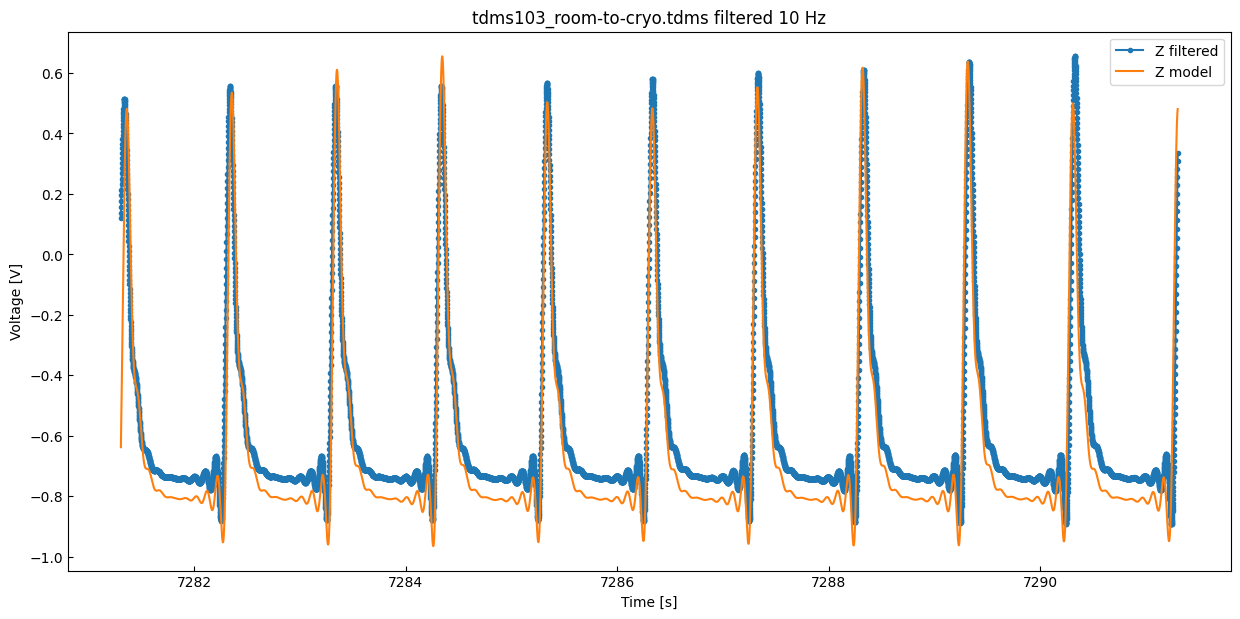

In [ ]:
zf = list(z_fourier1)

fig = plt.figure(figsize=[15,7])
#plt.plot(tf, Zdata[0:10000], alpha= 0.8, label ='Z signal')
plt.plot(tf, filteredZ[0:10000], '.-',alpha= 1, label ='Z filtered')
plt.plot(tf, zf, alpha= 1, label ='Z model')
#plt.plot(t, z_fourier2, alpha= 1, label ='Z2 model')
plt.legend(loc='upper right')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title(f'{filename} filtered {bandZ} Hz')
plt.show()

In [ ]:
low_th_red, high_th_red = -0.5, 0.5

low_thA_red, high_thA_red = -0.0005, 0.0005
low_thB_red, high_thB_red = -0.0005, 0.0005
period_accumZ_red_new, periodZ_red_new, time_stampsZ_red_new, time_indexZ_red_new = freq_calc_deriv(df_reduced['time'].to_numpy()[0:10000], filteredZ[0:10000], 
                                                                        high_th_red, low_th_red)


In [ ]:

period_accumB_red_new, periodB_red_new, time_stampsB_red_new, time_indexB_red_new = freq_calc_deriv(df_reduced['time'].to_numpy(), filteredB, 
                                                         high_thB_red, low_thB_red)
period_accumA_red_new, periodA_red_new, time_stampsA_red_new, time_indexA_red_new = freq_calc_deriv(df_reduced['time'].to_numpy(), filteredA, 
                                                         high_thA_red, low_thA_red)

In [ ]:
period_accumZ_red_old, periodZ_red_old, time_stampsZ_red_old, time_indexZ_red_old = lib_bbmdev.freq_calc(df_reduced['time'].to_numpy(), filteredZ, 
                                                                        high_th_red, low_th_red)

period_accumB_red_old, periodB_red_old, time_stampsB_red_old, time_indexB_red_old = lib_bbmdev.freq_calc(df_reduced['time'].to_numpy(), filteredB, 
                                                         high_thB_red, low_thB_red)
period_accumA_red_old, periodA_red_old, time_stampsA_red_old, time_indexA_red_old = lib_bbmdev.freq_calc(df_reduced['time'].to_numpy(), filteredA, 
                                                         high_thA_red, low_thA_red)

Calculating rotation frequency...: 100%|██████████| 1538696/1538696 [00:01<00:00, 882265.12it/s]


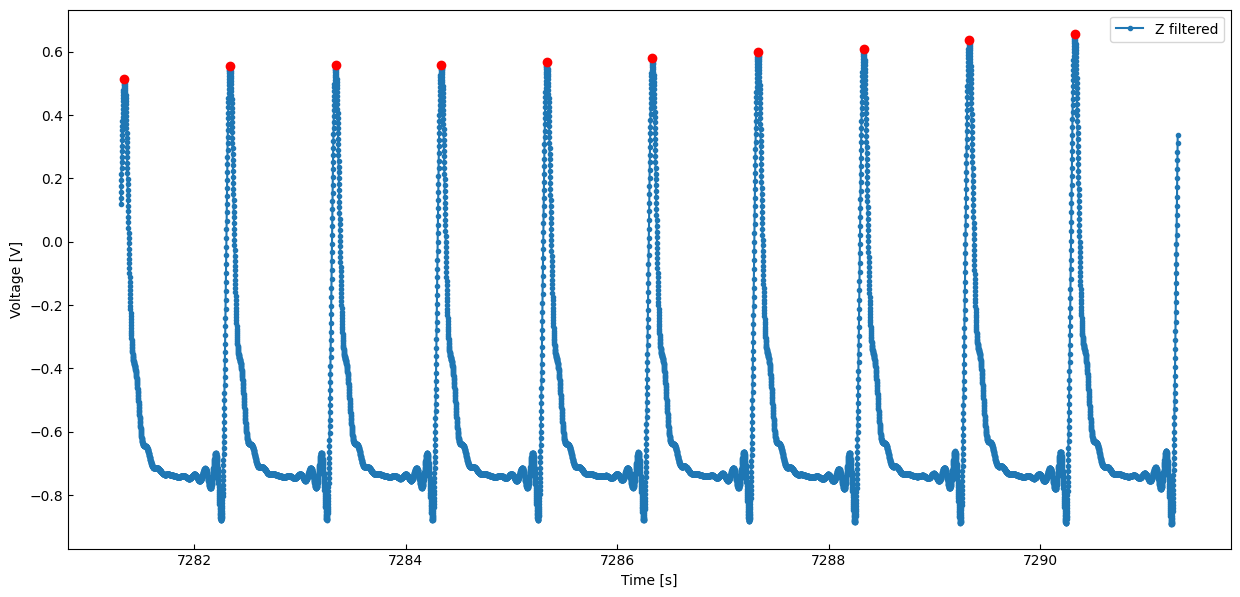

In [ ]:
function = 'aaa'

if function == 'new':
    time_indexA_red, time_indexB_red, time_indexZ_red = time_indexA_red_new, time_indexB_red_new, time_indexZ_red_new
    time_stampsA_red, time_stampsB_red, time_stampsZ_red = time_stampsA_red_new, time_stampsB_red_new, time_stampsZ_red_new
elif function == 'old':
    time_indexA_red, time_indexB_red, time_indexZ_red = time_indexA_red_old, time_indexB_red_old, time_indexZ_red_old
    time_stampsA_red, time_stampsB_red, time_stampsZ_red = time_stampsA_red_old, time_stampsB_red_old, time_stampsZ_red_old
fig = plt.figure(figsize=[15,7])
#plt.plot(df_reduced['time'], Adata, alpha= 0.8, label ='A signal')
#plt.plot(df_reduced['time'], filteredA, '.-',alpha= 1, label ='A filtered')
#plt.plot(df_reduced['time'], Zdata, alpha= 0.8, label ='Z signal')
plt.plot(df_reduced['time'][0:10000], filteredZ[0:10000], '.-',alpha= 1, label ='Z filtered')
#plt.axhline(y=-0.25)
#plt.axhline(y=0.65)

plt.plot(df_reduced['time'].to_numpy()[time_indexZ_red_new], filteredZ[time_indexZ_red_new], 'ro', alpha= 1)
#plt.plot(df_reduced['time'], filteredB, '.-', alpha= 1, label ='B filtered')
plt.legend(loc='upper right')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
#plt.xlim([8250, 8252.1])
#plt.title(f'{filename} filtered {bandAB} Hz')
plt.show()

In [ ]:
np.max(filteredZ[time_indexZ_red_new])

0.6551608932791014

In [ ]:
periodoA_red,freqA_red=lib_bbmdev.time2freq(time_stampsA_red)
target_freqA = target_freq*128
try:
    if target_freqA == 0.8*128:
        stable_indexA_red = np.where((freqA_red>0.955*target_freqA)&(freqA_red<1.01*target_freqA))[0]
    else:
        stable_indexA_red = np.where((freqA_red>target_freqA)&(freqA_red<1.01*target_freqA))[0]
    stable_strA_red = time_stampsA_red[1:][stable_indexA_red[0]]
    stable_finA_red = time_stampsA_red[1:][stable_indexA_red[-1]]
except:
    stable_strA_red = np.inf
    stable_finA_red = np.inf


periodoB_red,freqB_red=lib_bbmdev.time2freq(time_stampsB_red)
target_freqB = target_freq*128
try:
    if target_freqB == 0.8*128:
        stable_indexB_red = np.where((freqB_red>0.955*target_freqB)&(freqB_red<1.01*target_freqB))[0]
    else:
        stable_indexB_red = np.where((freqB_red>target_freqB)&(freqB_red<1.01*target_freqB))[0]
    stable_strB_red = time_stampsB_red[1:][stable_indexB_red[0]]
    stable_finB_red = time_stampsB_red[1:][stable_indexB_red[-1]]
except:
    stable_strB_red = np.inf
    stable_finB_red = np.inf


periodoZ_red,freqZ_red=lib_bbmdev.time2freq(time_stampsZ_red)
target_freqZ = target_freq
try:
    if target_freqZ == 0.8:
        stable_indexZ_red = np.where((freqZ_red>0.955*target_freqZ)&(freqZ_red<1.01*target_freqZ))[0]
    else:
        stable_indexZ_red = np.where((freqZ_red>target_freqZ)&(freqZ_red<1.01*target_freqZ))[0]
    stable_strZ_red = time_stampsZ_red[1:][stable_indexZ_red[0]]
    stable_finZ_red = time_stampsZ_red[1:][stable_indexZ_red[-1]]
except:
    stable_strZ_red = np.inf
    stable_finZ_red = np.inf


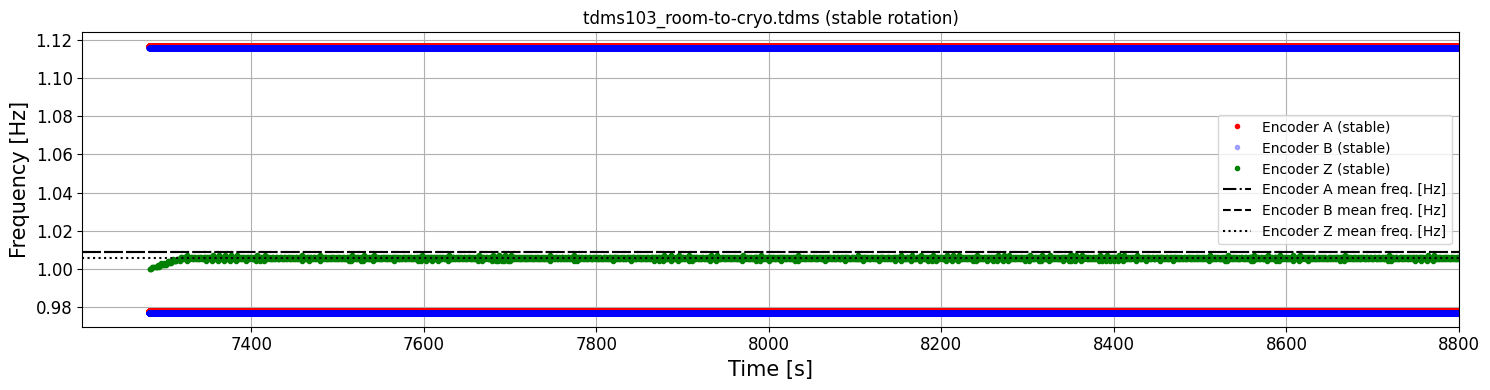

In [ ]:
#plot frequencies 
lower_limits_red, upper_limits_red= [], []
for i in [stable_strZ_red,stable_strA_red, stable_strB_red]:
    if i != np.inf:
        lower_limits_red.append(i)
for i in [stable_finZ_red,stable_finA_red, stable_finB_red]:
    if i != np.inf:
        upper_limits_red.append(i)
fig = plt.figure(figsize = (15,4))
ax = fig.add_subplot(111)
ax.plot(time_stampsA_red[1:],freqA_red/128+0.001,'r.',alpha=1,label = 'Encoder A (stable)') # frequency
ax.plot(time_stampsB_red[1:],freqB_red/128,'b.', alpha = 0.3,label = 'Encoder B (stable)') # frequency
#ax.plot(time_stamps[1:],freq,'g.-',label = 'Encoder Z (stable)') # frequency
ax.plot(time_stampsZ_red[1:],freqZ_red,'g.',label = 'Encoder Z (stable)') # frequency
#ax.axvline(x = stable_strZ,c = 'r',ls='-.',label = 'stable rot. start') # vertical line at the start
#ax.axvline(x = stable_finZ,c = 'r',ls='-.',label = 'stable rot. finish') # vertical line at the finish
ax.axhline(y = np.mean(freqA_red/128),c = 'k',ls='-.',label = 'Encoder A mean freq. [Hz]') # vertical line at the finish
ax.axhline(y = np.mean(freqB_red/128),c = 'k',ls='--',label = 'Encoder B mean freq. [Hz]') # vertical line at the finish
ax.axhline(y = np.mean(freqZ_red),c = 'k',ls=':',label = 'Encoder Z mean freq. [Hz]') # vertical line at the finish
ax.grid()
ax.set_xlabel('Time [s]',fontsize = 15)
ax.set_ylabel(r'Frequency [Hz]', fontsize = 15)
ax.tick_params(labelsize = 12)
ax.legend()
#ax.set_ylim(0,1.1)
#ax.set_ylim(0.9,1.15)
#ax.set_xlim([np.max(lower_limits_red), np.min(upper_limits_red)]) #this defines where all three encoders are stable
ax.set_xlim(right = 8800)
ax.set_title(f'{filename} (stable rotation)')
plt.tight_layout()
#plt.savefig(
           #"./" + "frequency.jpg",
           #dpi=130,
       #)
plt.show()

In [ ]:
len(time_stampsB_red)

197977

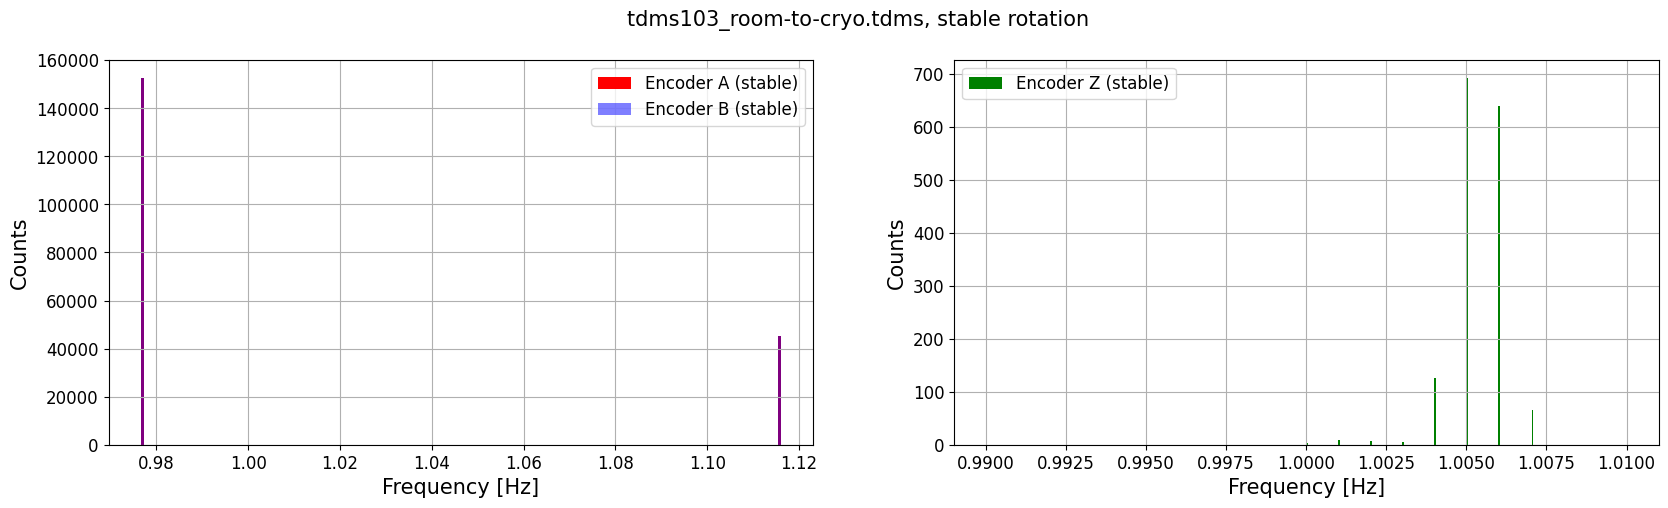

In [ ]:
fig = plt.figure(figsize=(20,5))
fig.suptitle(f'{filename}, stable rotation',fontsize=15)
plt.subplot(121)
plt.hist(freqA_red[:]/128, bins=200, color = 'r', label = 'Encoder A (stable)')
plt.hist(freqB_red[:]/128, bins=200, color = 'b', label = 'Encoder B (stable)', alpha = 0.5)
plt.xlabel('Frequency [Hz]', fontsize =15)
plt.ylabel('Counts', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.subplot(122)
plt.hist(freqZ_red[:], bins=500,range = [0.99,1.01], color = 'g', label = 'Encoder Z (stable)')
plt.xlabel('Frequency [Hz]', fontsize =15)
plt.ylabel('Counts', fontsize =15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid()
#plt.savefig(
           #"./" + "frequency_hist.jpg",
           #dpi=130,
       #)
plt.show()


In [ ]:
np.mean(freqA_red[:])/128, np.mean(freqB_red[:])/128, np.mean(freqZ_red[:]), np.std(freqA_red[:]/128), np.std(freqB_red[:])/128, np.std(freqZ_red[:])

(1.005396040091961,
 1.005395300691865,
 1.0054434333348197,
 0.001527050796170194,
 0.0015358506882145809,
 0.0074625006623135195)

In [ ]:
def score(input, target, w_mean=0.35, w_std=0.65):
    score = w_mean*(1-abs(input[0]-target[0])/input[0]) + w_std*(1-abs(input[1]-target[1])/input[1])
    print(w_mean*(1-abs(input[0]-target[0])/input[0]), w_std*(1-abs(input[1]-target[1])/input[1]))
    return score

In [ ]:
score([1.005396040091961, 0.001527050796170194],[1.0054434333348197, 0.0074625006623135195] )

0.3499835013921489 -1.87646632493761


-1.526482823545461

In [ ]:
#try to reconstruct the signals
#fa, fb, fz = np.mean(freqA_red[0:]), np.mean(freqB_red[0:]), np.mean(freqZ_red[0:]) #theoretical frequencies
fa, fb, fz = 1.005396040091961*128, 1.005395300691865*128, 1.0054434333348197
amp_A = np.mean(filteredA[time_indexA_red])
amp_B = np.mean(filteredB[time_indexB_red])
amp_Z = np.mean(filteredZ[time_indexZ_red])
t = df_reduced['time'].to_numpy()


In [ ]:
amp_A, amp_B, fa, fb

(0.013339699222433669,
 0.01407871254636402,
 128.690693131771,
 128.69059848855872)

In [ ]:
rs_square, rs_sin = 0, 0
phase_A_square, phase_A_sin = 0, 0
phases_A = np.arange(0, 2*np.pi, 0.05)
for i in phases_A:
    squareA = amp_A*scipy.signal.square(2*np.pi*fa*t+i)
    sinA = amp_A*np.sin(2*np.pi*fa*t+i)
    r_square = np.corrcoef(filteredA, squareA)
    r_sin = np.corrcoef(filteredA, sinA)
    if abs(r_square[1,0]) > abs(rs_square):
        rs_square = r_square[1,0]
        phase_A_square = i
    if abs(r_sin[1,0]) > abs(rs_sin):
        rs_sin = r_sin[1,0]
        phase_A_sin = i
print(rs_square, rs_sin, phase_A_square, phase_A_sin)


0.014232163775143221 0.015796858096360902 4.05 4.05


In [ ]:
rs_square, rs_sin = 0, 0
phase_B_square, phase_B_sin = 0, 0
phases_B = np.arange(0, 2*np.pi, 0.05)
for i in phases_B:
    squareB = amp_B*scipy.signal.square(2*np.pi*fb*t+i)
    sinB = amp_B*np.sin(2*np.pi*fb*t+i)
    r_square = np.corrcoef(filteredB, squareB)
    r_sin = np.corrcoef(filteredB, sinB)
    if abs(r_square[1,0]) > abs(rs_square):
        rs_square = r_square[1,0]
        phase_B_square = i
    if abs(r_sin[1,0]) > abs(rs_sin):
        rs_sin = r_sin[1,0]
        phase_B_sin = i
print(rs_square, rs_sin, phase_B_square, phase_B_sin)

0.010470293690965147 -0.011618550976573511 4.5 1.4000000000000001


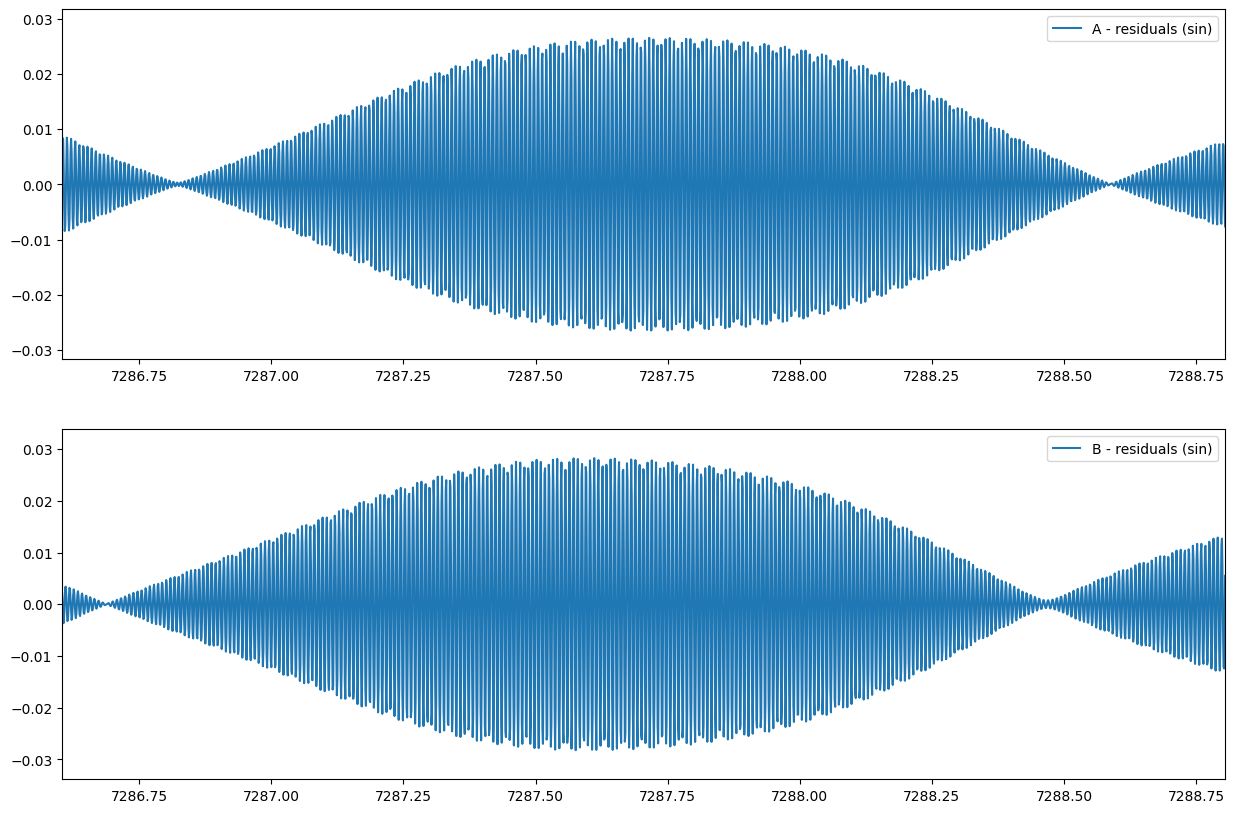

In [ ]:
#squareA = amp_A*scipy.signal.square(2*np.pi*fa*t+phase_A)
#sinA = amp_A*np.sin(2*np.pi*fa*t+phase_A)

squareA = amp_A*scipy.signal.square(2*np.pi*fa*t+phase_A_square)
sinA = amp_A*np.sin(2*np.pi*fa*t+phase_A_sin)

squareB = amp_B*scipy.signal.square(2*np.pi*fb*t+phase_B_square)
sinB = amp_B*np.sin(2*np.pi*fb*t+phase_B_sin+np.pi)

fig=plt.figure(figsize=[15,10])
plt.subplot(211)
#plt.plot(t, filteredA, label='A filtered')
#plt.plot(t, squareA, label='A square')
#plt.plot(t, sinA, label='A sin')
plt.plot(t, filteredA-sinA, label = 'A - residuals (sin)')
plt.legend(loc='upper right')
plt.xlim([t[5300], t[7500]])

plt.subplot(212)
#plt.plot(t, filteredB, label='B filtered')
#plt.plot(t, squareB, label='B square')
#plt.plot(t, sinB, label='B sin')
plt.plot(t, filteredB-sinB, label = 'B - residuals (sin)')
plt.legend(loc='upper right')
plt.xlim([t[5300], t[7500]])

plt.show()